In [1]:
pip install pillow 

In [2]:
from IPython.display import Image

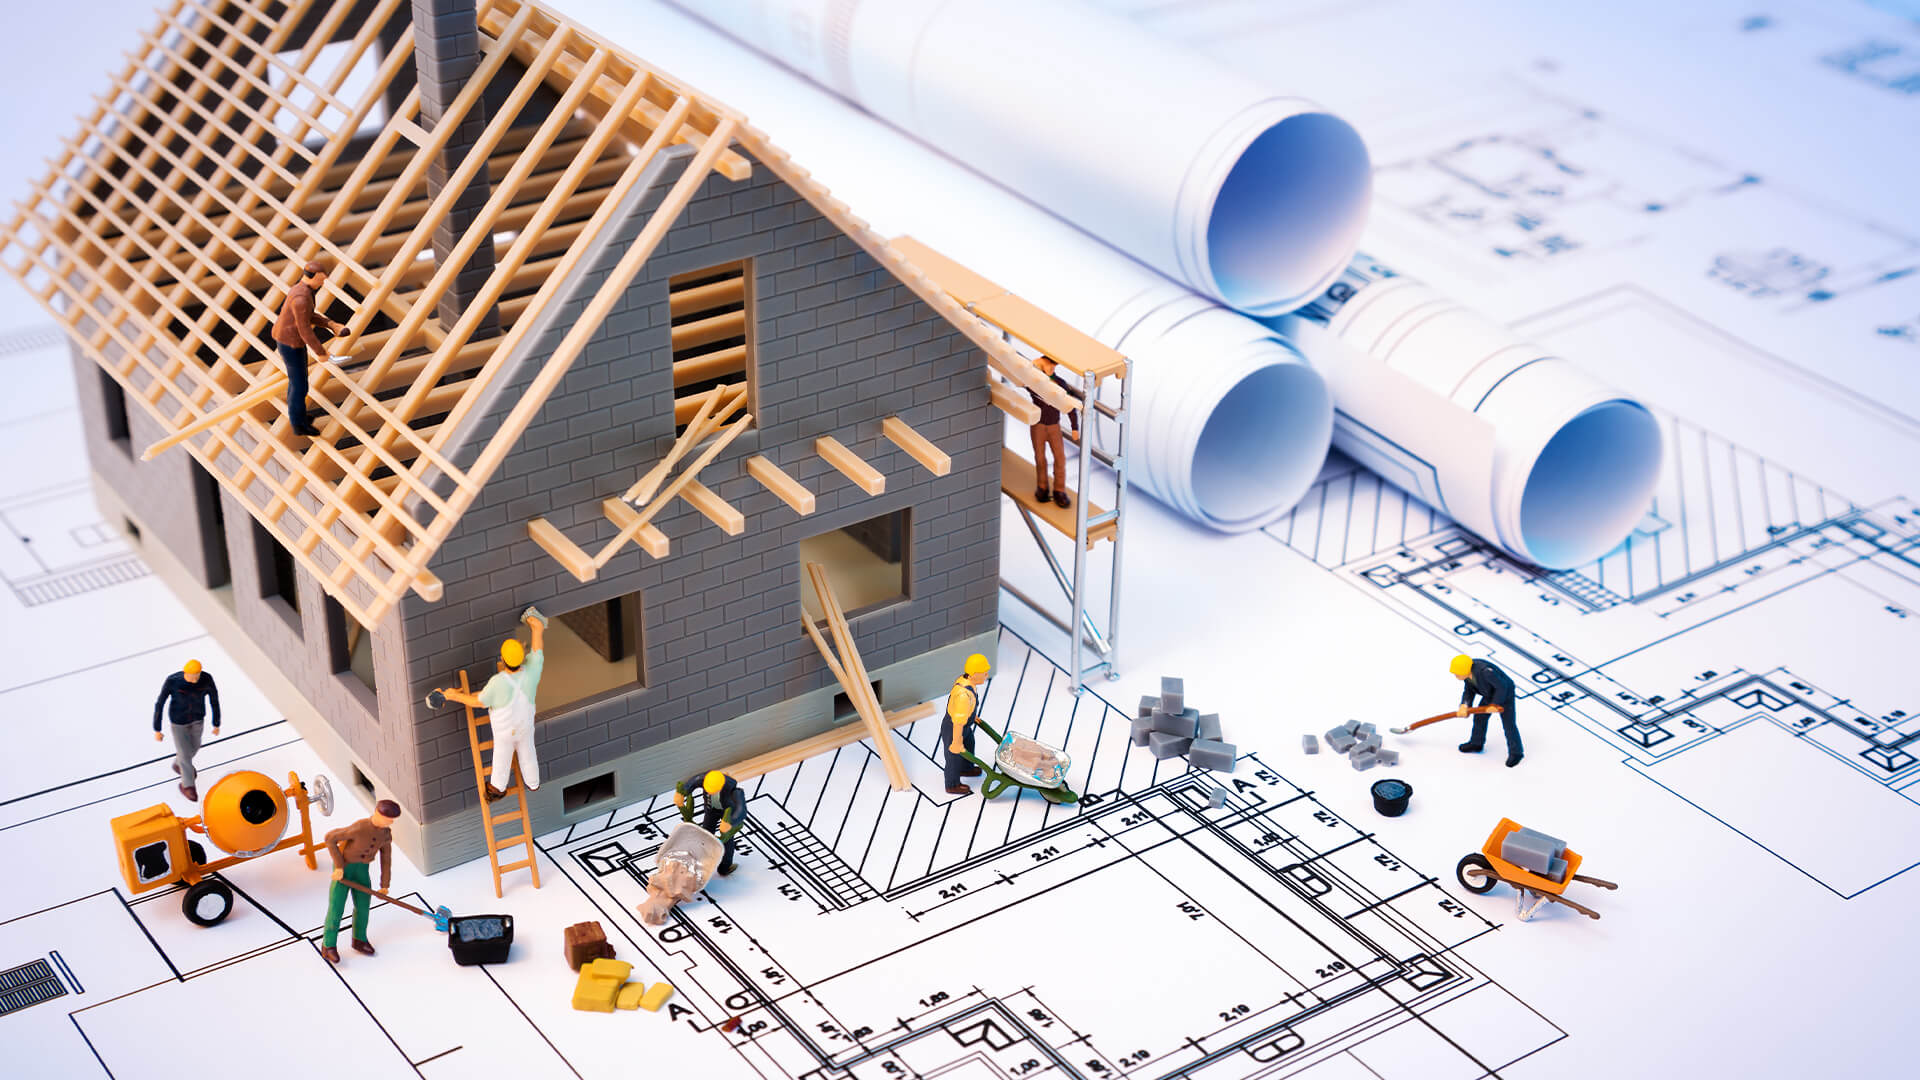

In [3]:
Image ("Images/Home builder.jpg" , width=1000, height=500)

# KING COUNTY HOUSE SALES ANALYSIS REPORT 

**Author: Sneha Bhaskar**

**Date**: 24 September 2023

___________________________________________

# Overview

This project analyzes the King County House Sales Dataset to answer the buisness case question on what type of housing features to focus when building a house and selling in King County Washington, United States. Utilizing the OSEMN framework for data science, it appears that the most valuable feature for a Pro Home Builder Company would be living area square footage and zipcode. Zip codes provide contextual information about property values, local demand, and building regulations, allowing builders to strategically choose locations and tailor their designs to specific demographics. Square footage, on the other hand, directly influences construction costs, selling price, and design considerations plus building grade improves, the house price rises as well.

# Business Problem 


The Pro Home Builder Company aims to construct residences in King County Washington, and wants to identify which housing features/areas to focus on for maximum profitability. By understanding which amenities significantly influence home prices, the company can make data-driven choices on the types of houses to build in order to optimize profits



**Import standard packages**

In [4]:
import pandas as pd #data manipulation and analysis. Can create data frames, filter data, group by attributes, etc. 
import numpy as np #numerical python library for array manipulation, math functions etc.
import seaborn as sns #data visualization library based on Matplotlib, with higher-level functions ad nicer default styles. 

import matplotlib.pyplot as plt #2D plotting lib.
plt.style.use("ggplot") #changes the default style of Matplotlib plots to ggplot.

from statsmodels.formula.api import ols #ordinary least square (OLS) is a regression model aiming to minimise the sum of squared differences between observed and predicted values.
import statsmodels.api as sm #statsmodel includes various statistical tests, models and functions. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #a measure to detect multicollinearity in regression moedels.
import scipy.stats as stats #statistical functions from the SciPy lib, which builds on NumPy. This lib also provides a large number of probability distribution, statistical functions and test for statistical analysis. 
from sklearn.linear_model import LinearRegression  #linear model
from sklearn.model_selection import train_test_split #function for splitting datasets into training and testing sets. 
from sklearn.metrics import mean_squared_error #function for computing the mean squarred error, a meausure of the average of the sqaures of the errors.
from sklearn.preprocessing import OneHotEncoder #preprocessing technique to convert categorical variables to a format that can be provided to machine learning algorithms to improve prediction 
from sklearn.model_selection import cross_val_score #function for evaluating a model using cross-validation 
from sklearn.model_selection import KFold #K-Fold cross validator
from itertools import combinations #itertools is used for generating all possible combination of the given list.

## Kings County House Dataset

In [5]:
df = pd.read_csv ('Data/kc_house_data.csv')
df

id        date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900         3       1.00         1180   
1      6414100192  12/09/2014  538000         3       2.25         2570   
2      5631500400   2/25/2015  180000         2       1.00          770   
3      2487200875  12/09/2014  604000         4       3.00         1960   
4      1954400510   2/18/2015  510000         3       2.00         1680   
...           ...         ...     ...       ...        ...          ...   
21592   263000018   5/21/2014  360000         3       2.50         1530   
21593  6600060120   2/23/2015  400000         4       2.50         2310   
21594  1523300141   6/23/2014  402101         2       0.75         1020   
21595   291310100   1/16/2015  400000         3       2.50         1600   
21596  1523300157  10/15/2014  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                  0     1955           0.0    98178  47.5112 -122.257   
1                400     1951        1991.0    98125  47.7210 -122.319   
2                  0     1933           NaN    98028  47.7379 -122.233   
3                910     1965           0.0    98136  47.5208 -122.393   
4                  0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592              0     2009           0.0    98103  47.6993 -122.346   
21593              0     2014           0.0    98146  47.5107 -122.362   
21594              0     2009           0.0    98144  47.5944 -122.299   
21595              0     2004           0.0    98027  47.5345 -122.069   
21596              0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [6]:
#check for duplicates
df.duplicated(keep = False).sum()

0

### OBTAIN

<font color='red' >This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data we think will be necessary for solving this problem  </font>

In [7]:
#Removing columns that is not required from this dataframe for our business problem
df.drop(['id'], axis= 1, inplace = True)
df.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900         3       1.00         1180      5650     1.0   
1  12/09/2014  538000         3       2.25         2570      7242     2.0   
2   2/25/2015  180000         2       1.00          770     10000     1.0   
3  12/09/2014  604000         4       3.00         1960      5000     1.0   
4   2/18/2015  510000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180             0      1955   
1         0.0   0.0          3      7        2170           400      1951   
2         0.0   0.0          3      6         770             0      1933   
3         0.0   0.0          5      7        1050           910      1965   
4         0.0   0.0          3      8        1680             0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [8]:
print("The number of rows is",df.shape[0])
print('The number of columns is',df.shape[1])

The number of rows is 21597
The number of columns is 20


### SCRUB 

<font color='red' >This step focuses on cleaning the data, which involves handling missing values, removing outliers, and converting data types and many more. Data cleaning is crucial because the quality of data affects the quality of the final model produced</font>

In [9]:
df.info() 
#all of the columns are in integer/float format except "date" and "sqft_basement" are in object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [10]:
df.describe()
#Bedrooms has an outliers of 33 rooms
#waterfront, condition, grade looks like a categorical data

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

In [11]:
#check for null values 
df.isna().sum()
#waterfront and yr_renovated are the only columns with null values 

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Flll null values for waterfront**

In [12]:
print(df.waterfront.isnull().sum())
print(df['waterfront'].value_counts())

2376
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [13]:
print('Mean = ',df['waterfront'].mean())
print('Median = ',df['waterfront'].median())

Mean =  0.007595858696217679
Median =  0.0


In [14]:
# Replace all the missing values in the waterfront column with the Median
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)
df['waterfront'].isnull().sum()

0

In [15]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0             0.0   0.0          3      7        1180             0      1955   
1             0.0   0.0          3      7        2170           400      1951   
2             0.0   0.0          3      6         770             0      1933   
3             0.0   0.0          5      7        1050           910      1965   
4             0.0   0.0          3      8        1680             0      1987   
...           ...   ...        ...    ...         ...           ...       ...   
21592         0.0   0.0          3      8        1530             0      2009   
21593         0.0   0.0          3      8        2310             0      2014   
21594         0.0   0.0          3      7        1020             0      2009   
21595         0.0   0.0          3      8        1600             0      2004   
21596         0.0   0.0          3      7        1020             0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0               0.0    98178  47.5112 -122.257           1340        5650  
1            1991.0    98125  47.7210 -122.319           1690        7639  
2               NaN    98028  47.7379 -122.233           2720        8062  
3               0.0    98136  47.5208 -122.393           1360        5000  
4               0.0    98074  47.6168 -122.045           1800        7503  
...             ...      ...      ...      ...            ...         ...  
21592           0.0    98103  47.6993 -122.346           1530        1509  
21593           0.0    98146  47.5107 -122.362           1830        7200  
21594           0.0    98144  47.5944 -122.299           1020        2007  
21595           0.0    98027  47.5345 -122.069           1410        1287  
21596           0.0    98144  47.5941 -122.299           1020        1357  

[21597 rows x 20 columns]

**Create a new column to replace the yr_renovated where 1 = Renovated and 0 = Not renovated**

In [16]:
df.yr_renovated.mean()

83.6367783722895

In [17]:
df.yr_renovated.median()

0.0

In [18]:
df.yr_renovated.fillna(df.yr_renovated.median(),inplace=True)
df.yr_renovated.isnull().sum()

0

In [19]:
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)

In [20]:
#drop the "yr_rnovated" colum
df.drop('yr_renovated',axis=1, inplace = True)

In [21]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0             0.0   0.0          3      7        1180             0      1955   
1             0.0   0.0          3      7        2170           400      1951   
2             0.0   0.0          3      6         770             0      1933   
3             0.0   0.0          5      7        1050           910      1965   
4             0.0   0.0          3      8        1680             0      1987   
...           ...   ...        ...    ...         ...           ...       ...   
21592         0.0   0.0          3      8        1530             0      2009   
21593         0.0   0.0          3      8        2310             0      2014   
21594         0.0   0.0          3      7        1020             0      2009   
21595         0.0   0.0          3      8        1600             0      2004   
21596         0.0   0.0          3      7        1020             0      2008   

       zipcode      lat     long  sqft_living15  sqft_lot15  renovated  
0        98178  47.5112 -122.257           1340        5650          0  
1        98125  47.7210 -122.319           1690        7639          1  
2        98028  47.7379 -122.233           2720        8062          0  
3        98136  47.5208 -122.393           1360        5000          0  
4        98074  47.6168 -122.045           1800        7503          0  
...        ...      ...      ...            ...         ...        ...  
21592    98103  47.6993 -122.346           1530        1509          0  
21593    98146  47.5107 -122.362           1830        7200          0  
21594    98144  47.5944 -122.299           1020        2007          0  
21595    98027  47.5345 -122.069           1410        1287          0  
21596    98144  47.5941 -122.299           1020        1357          0  

[21597 rows x 20 columns]

In [22]:
df.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64

**Clean "Sqft_Basement" column by replacing '?' with 0 and converting the data type from object ot float**

In [23]:
df.sqft_basement.value_counts()

0       12826
?         454
600       217
500       209
700       208
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 304, dtype: int64

In [24]:
#replace the '?' in the besement column with 0
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0.0')

In [25]:
df.sqft_basement.value_counts()

0       12826
0.0       454
600       217
500       209
700       208
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 304, dtype: int64

In [26]:
#convert the data type of 'sqft_basement' from object to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#confirm we don't have any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [28]:
#check the data statistics
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233863      3.409825      7.657915   
std        0.539683      0.081944      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built       zipcode           lat  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676  98077.951845     47.560093   
std      827.759761     439.819830     29.375234     53.513072      0.138552   
min      370.000000       0.000000   1900.000000  98001.000000     47.155900   
25%     1190.000000       0.000000   1951.000000  98033.000000     47.471100   
50%     1560.000000       0.000000   1975.000000  98065.000000     47.571800   
75%     2210.000000     550.000000   1997.000000  98118.000000     47.678000   
max     9410.000000    4820.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15     renovated  
count  21597.000000   21597.000000   21597.000000  21597.000000  
mean    -122.213982    1986.620318   12758.283512      0.034449  
std        0.140724     685.230472   27274.441950      0.182384  
min     -122.519000     399.000000     651.000000      0.000000  
25%     -122.328000    1490.000000    5100.000000      0.000000  
50%     -122.231000    1840.000000    7620.000000      0.000000  
75%     -122.125000    2360.000000   10083.000000      0.000000  
max     -121.315000    6210.000000  871200.000000      1.000000

## PRICE

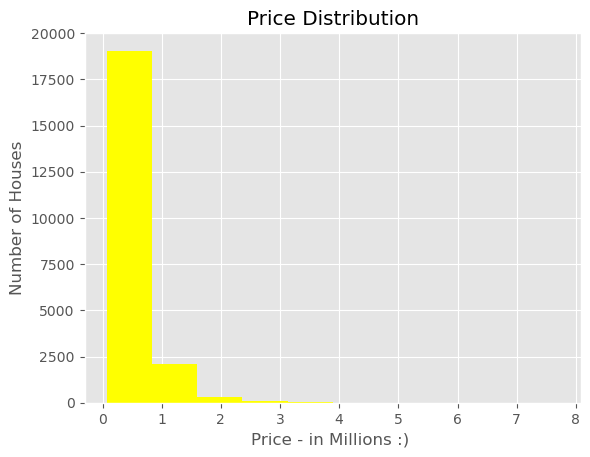

In [29]:
# Check price distribution
df['price'].div(1000000).hist(color = "yellow")
plt.title('Price Distribution');
plt.xlabel('Price - in Millions :) ');
plt.ylabel('Number of Houses');

#the majority of houses are below the price of 2 million 

In [30]:
#reduce the data to only houses equal to or below 1.5 million 
df_og = df.copy()
# remove houses above 1.5 million, boolean mask
df = df[df['price'] <= 1500000]

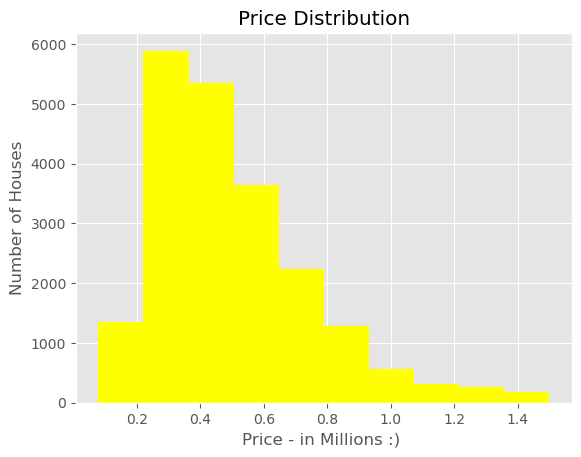

In [31]:
# RECHECK price distribution
df['price'].div(1000000).hist(color = "yellow")
plt.title('Price Distribution');
plt.xlabel('Price - in Millions :) ');
plt.ylabel('Number of Houses');

**Majority of the houses are in between 0.3 - 0.5 price range**

## BEDROOMS

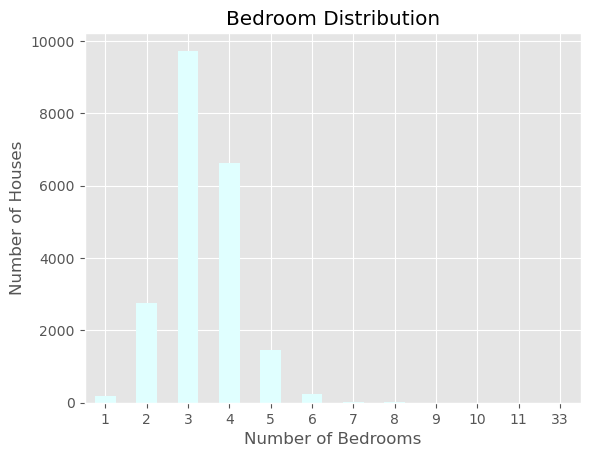

In [32]:
# Plot bedrooms as categorical - ordinal
df['bedrooms'].value_counts().sort_index().plot(kind = 'bar', color = "lightcyan")
plt.xticks(rotation = 0);
plt.title('Bedroom Distribution');
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of Houses');


In [33]:
#reduce the data to only bedrooms equal to or below 6
df_og = df.copy()
# remove bedrooms  above 6, boolean mask
df = df[df['bedrooms'] <=6]

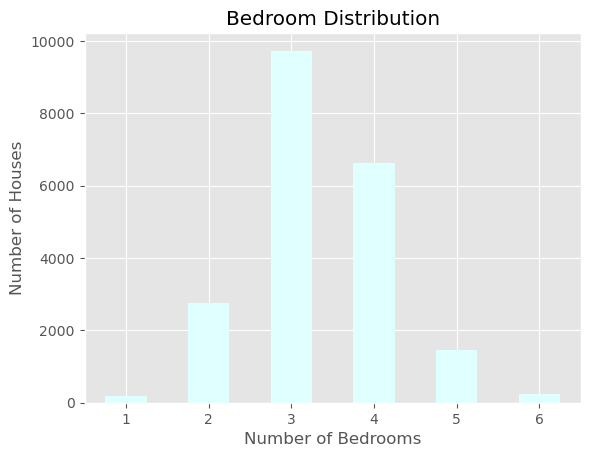

In [34]:
# Plot bedrooms as categorical - ordinal
df['bedrooms'].value_counts().sort_index().plot(kind = 'bar', color = "lightcyan")
plt.xticks(rotation = 0);
plt.title('Bedroom Distribution');
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of Houses'); 

#by removings the 33 outliers for bedrooms , its summarises that houses with 3 or 4 bedrooms are the most common in the dataset. 

**Houses with 3 or 4 bedrooms are the most common in the dataset**

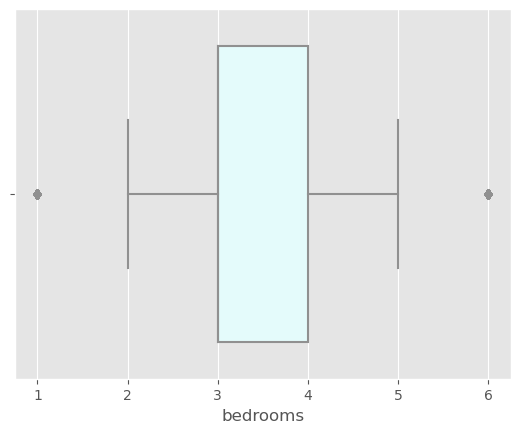

In [35]:
sns.boxplot(x = df['bedrooms'], color = "lightcyan");

#Boxplot shows are normal distribution

## BATHROOMS

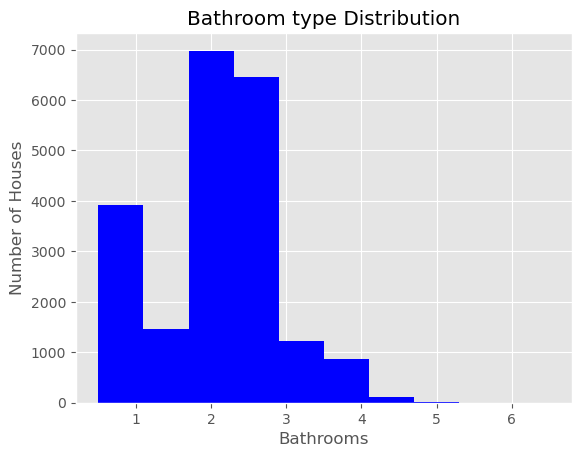

In [36]:
# Check bathroom types distribution
df['bathrooms'].hist(color = "BLUE")
plt.title('Bathroom type Distribution');
plt.xlabel('Bathrooms');
plt.ylabel('Number of Houses');

**There appears to be an outlier and most of the houses have 2 or 3 bathrooms**

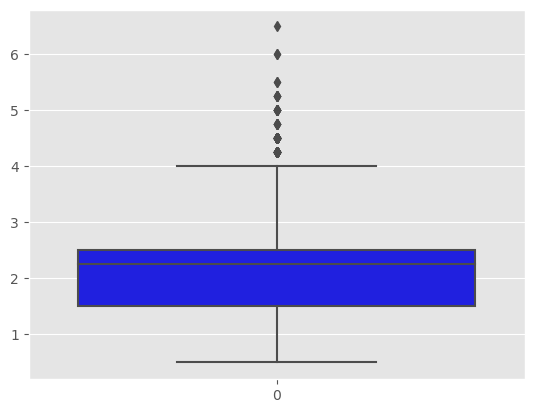

In [37]:
# Boxplot to detect outliers
sns.boxplot(df['bathrooms'], color = "BLUE");

#there are handfull of outliers above 4 

In [38]:
# Drop houses that have more than 4 bathrooms
df = df[df['bathrooms'] < 4]

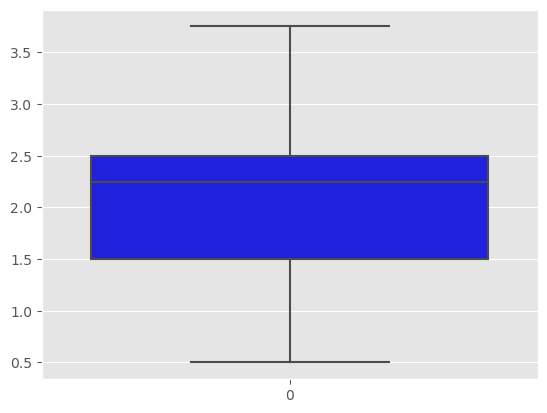

In [39]:
# Boxplot to detect outliers
sns.boxplot(df['bathrooms'], color = "BLUE");

#Boxplot shows are normal distribution

## SQFT_LIVING

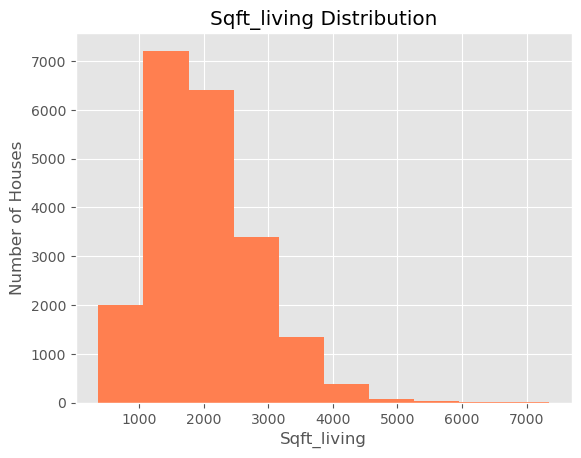

In [40]:
# Check sqft_living distribution
df['sqft_living'].hist(color = "coral")
plt.title('Sqft_living Distribution');
plt.xlabel('Sqft_living');
plt.ylabel('Number of Houses');

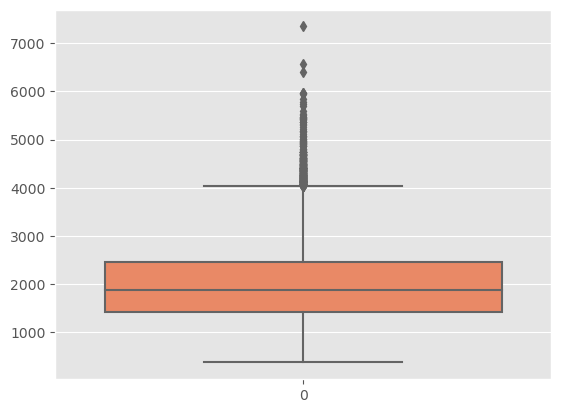

In [41]:
# Box plot for outliers
#There are outliers above 4000 sqft_living.
sns.boxplot(df['sqft_living'], color = "coral");

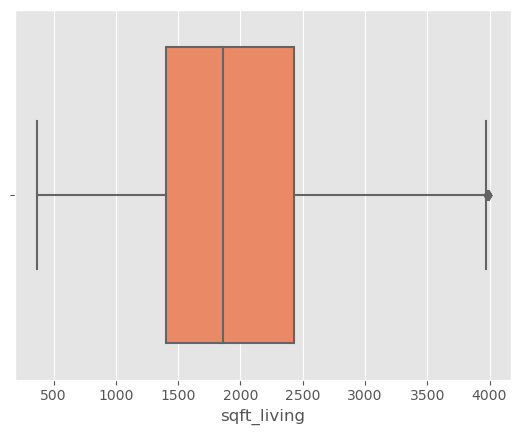

In [42]:
# Drop outliers in sqft_living
df = df[df['sqft_living'] < 4000]
sns.boxplot(x = df['sqft_living'], color = "coral");

**1500 - 2500 sqft_living is most commonly observed footage of the house in this dataset**

## SQFT_LOT

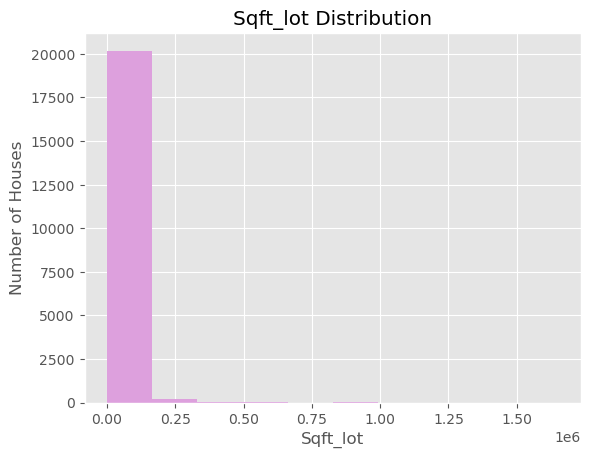

In [43]:
# Check sqft_lot distribution
df['sqft_lot'].hist(color = "plum")
plt.title('Sqft_lot Distribution');
plt.xlabel('Sqft_lot');
plt.ylabel('Number of Houses');

In [44]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.044600e+04  20446.000000  20446.000000  20446.000000  2.044600e+04   
mean   4.872377e+05      3.310036      2.033735   1954.156705  1.399462e+04   
std    2.327866e+05      0.850293      0.676472    724.038899  3.766160e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.150000e+05      3.000000      1.500000   1400.000000  5.000000e+03   
50%    4.380000e+05      3.000000      2.000000   1860.000000  7.500000e+03   
75%    6.050000e+05      4.000000      2.500000   2430.000000  1.023275e+04   
max    1.500000e+06      6.000000      3.750000   3990.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  20446.000000  20446.000000  20389.000000  20446.000000  20446.000000   
mean       1.472684      0.003473      0.185541      3.412990      7.531155   
std        0.536808      0.058827      0.670327      0.651379      1.028564   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     11.000000   

         sqft_above  sqft_basement      yr_built       zipcode           lat  \
count  20446.000000   20446.000000  20446.000000  20446.000000  20446.000000   
mean    1689.134892     259.663602   1970.357332  98078.832290     47.558019   
std      687.127178     398.548166     29.259615     53.520325      0.140343   
min      370.000000       0.000000   1900.000000  98001.000000     47.155900   
25%     1170.000000       0.000000   1951.000000  98033.000000     47.463025   
50%     1520.000000       0.000000   1973.000000  98070.000000     47.568900   
75%     2090.000000     500.000000   1995.000000  98118.000000     47.679300   
max     3990.000000    2000.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15     renovated  
count  20446.000000   20446.000000   20446.000000  20446.000000  
mean    -122.215928    1917.466937   12048.511102      0.031840  
std        0.141058     600.653927   24821.682888      0.175578  
min     -122.519000     399.000000     651.000000      0.000000  
25%     -122.331000    1470.000000    5026.000000      0.000000  
50%     -122.236000    1800.000000    7508.000000      0.000000  
75%     -122.127000    2280.000000    9826.750000      0.000000  
max     -121.315000    5790.000000  560617.000000      1.000000

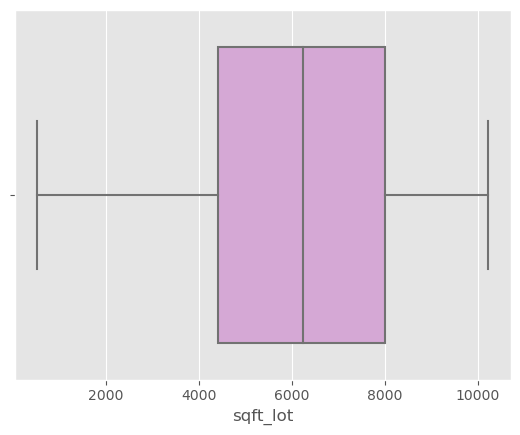

In [45]:
# Drop houses that are above the 75 percentile
df = df[df['sqft_lot'] < 1.023275e+04]
sns.boxplot(x = df['sqft_lot'], color = "plum");

**The majority of houses have between 4000 and 8000 sqft_lot.**

## FLOORS

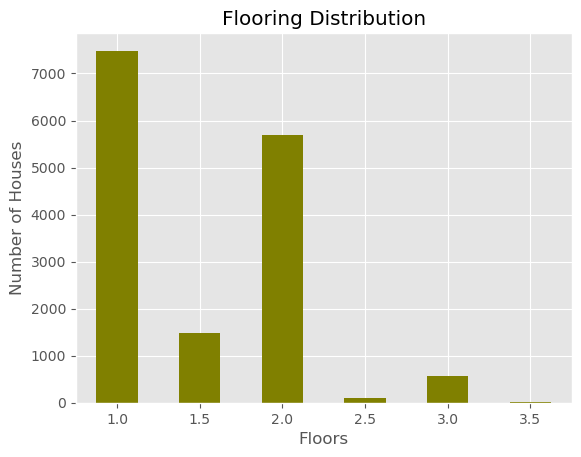

In [46]:
# Plot a bar chart to check distribution of flooring
df['floors'].value_counts().sort_index().plot(kind = 'bar', color = "OLIVE")
plt.xticks(rotation = 0)
plt.title('Flooring Distribution');
plt.xlabel('Floors');
plt.ylabel('Number of Houses');

**Most houses have either 1 or 2 floors.**

## WATERFRONT

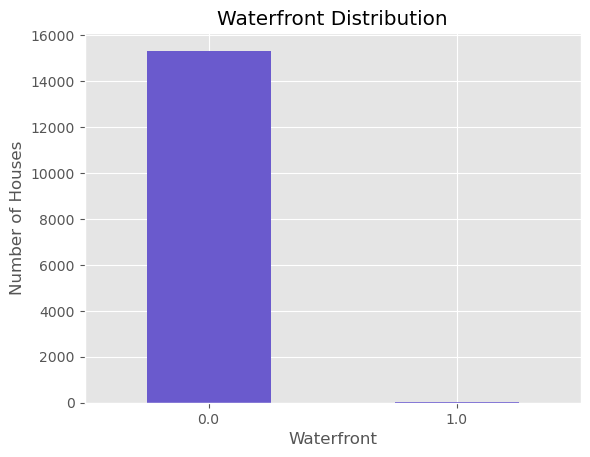

In [47]:
# Plot a bar chart for waterfront
df['waterfront'].value_counts().sort_index().plot(kind = 'bar', color = "slateblue")
plt.xticks(rotation = 0)
plt.title('Waterfront Distribution');
plt.xlabel('Waterfront');
plt.ylabel('Number of Houses');

Waterfront is categorical as it has two categories. Also, the majority of the homes are not waterfront.
99% of houses do not have waterfront.

In [48]:
#checking data types 
df.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
renovated          int32
dtype: object

### EXPLORE 

<font color='red' > After cleaning the data, I then explore it to understand its structure, trends, and patterns. This typically involves generating descriptive statistics, and visualizing the data using various kinds of plots. The goal is to gain insights that will help you when modeling.  </font>

## Identify categorical variables

In [49]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180            0.0   
1             0.0   0.0          3      7        2170          400.0   
2             0.0   0.0          3      6         770            0.0   
3             0.0   0.0          5      7        1050          910.0   
4             0.0   0.0          3      8        1680            0.0   
...           ...   ...        ...    ...         ...            ...   
21592         0.0   0.0          3      8        1530            0.0   
21593         0.0   0.0          3      8        2310            0.0   
21594         0.0   0.0          3      7        1020            0.0   
21595         0.0   0.0          3      8        1600            0.0   
21596         0.0   0.0          3      7        1020            0.0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          1955    98178  47.5112 -122.257           1340        5650   
1          1951    98125  47.7210 -122.319           1690        7639   
2          1933    98028  47.7379 -122.233           2720        8062   
3          1965    98136  47.5208 -122.393           1360        5000   
4          1987    98074  47.6168 -122.045           1800        7503   
...         ...      ...      ...      ...            ...         ...   
21592      2009    98103  47.6993 -122.346           1530        1509   
21593      2014    98146  47.5107 -122.362           1830        7200   
21594      2009    98144  47.5944 -122.299           1020        2007   
21595      2004    98027  47.5345 -122.069           1410        1287   
21596      2008    98144  47.5941 -122.299           1020        1357   

       renovated  
0              0  
1              1  
2              0  
3              0  
4              0  
...          ...  
21592          0  
21593          0  
21594          0  
21595          0  
21596          0  

[15334 rows x 20 columns]

In [50]:
#fill out NaN values for Zipcode 
df.zipcode.mean()
df.zipcode.median()
df.zipcode.fillna(df.zipcode.median(),inplace=True)
df.zipcode.isnull().sum()

0

In [51]:
df.tail()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
21592         0.0   0.0          3      8        1530            0.0   
21593         0.0   0.0          3      8        2310            0.0   
21594         0.0   0.0          3      7        1020            0.0   
21595         0.0   0.0          3      8        1600            0.0   
21596         0.0   0.0          3      7        1020            0.0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
21592      2009    98103  47.6993 -122.346           1530        1509   
21593      2014    98146  47.5107 -122.362           1830        7200   
21594      2009    98144  47.5944 -122.299           1020        2007   
21595      2004    98027  47.5345 -122.069           1410        1287   
21596      2008    98144  47.5941 -122.299           1020        1357   

       renovated  
21592          0  
21593          0  
21594          0  
21595          0  
21596          0

In [52]:
df.reset_index(drop = True)

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
15329   5/21/2014  360000         3       2.50         1530      1131     3.0   
15330   2/23/2015  400000         4       2.50         2310      5813     2.0   
15331   6/23/2014  402101         2       0.75         1020      1350     2.0   
15332   1/16/2015  400000         3       2.50         1600      2388     2.0   
15333  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180            0.0   
1             0.0   0.0          3      7        2170          400.0   
2             0.0   0.0          3      6         770            0.0   
3             0.0   0.0          5      7        1050          910.0   
4             0.0   0.0          3      8        1680            0.0   
...           ...   ...        ...    ...         ...            ...   
15329         0.0   0.0          3      8        1530            0.0   
15330         0.0   0.0          3      8        2310            0.0   
15331         0.0   0.0          3      7        1020            0.0   
15332         0.0   0.0          3      8        1600            0.0   
15333         0.0   0.0          3      7        1020            0.0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          1955    98178  47.5112 -122.257           1340        5650   
1          1951    98125  47.7210 -122.319           1690        7639   
2          1933    98028  47.7379 -122.233           2720        8062   
3          1965    98136  47.5208 -122.393           1360        5000   
4          1987    98074  47.6168 -122.045           1800        7503   
...         ...      ...      ...      ...            ...         ...   
15329      2009    98103  47.6993 -122.346           1530        1509   
15330      2014    98146  47.5107 -122.362           1830        7200   
15331      2009    98144  47.5944 -122.299           1020        2007   
15332      2004    98027  47.5345 -122.069           1410        1287   
15333      2008    98144  47.5941 -122.299           1020        1357   

       renovated  
0              0  
1              1  
2              0  
3              0  
4              0  
...          ...  
15329          0  
15330          0  
15331          0  
15332          0  
15333          0  

[15334 rows x 20 columns]

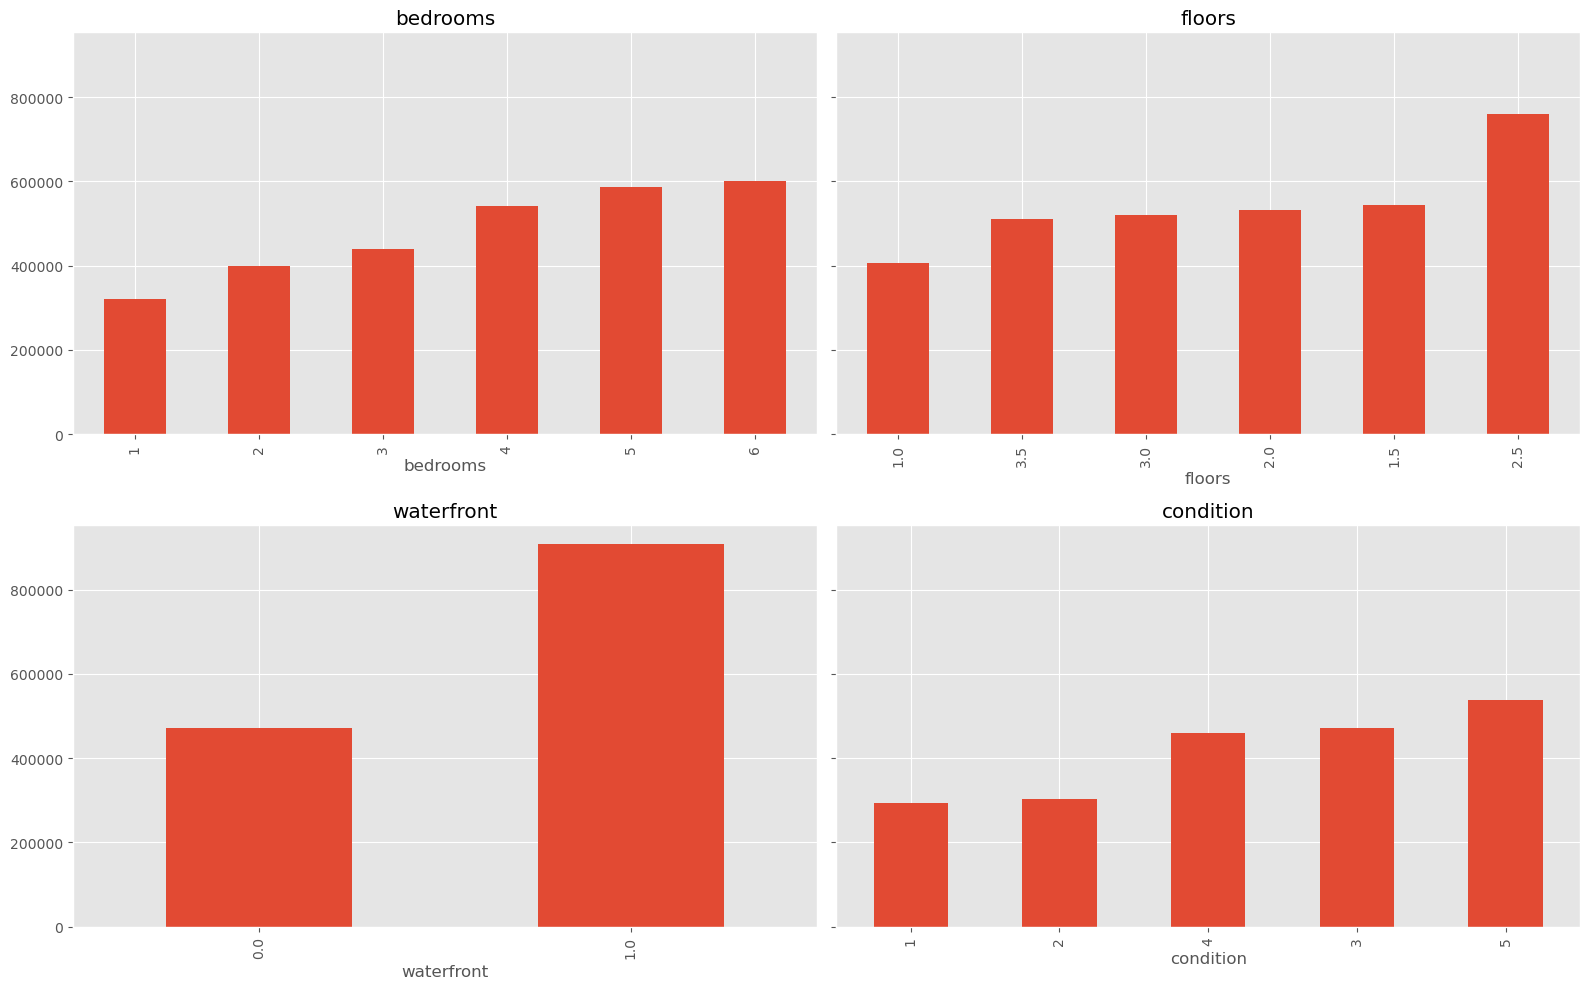

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharey=True)

cat = ['bedrooms', 'floors', 'waterfront', 'condition']

for col, ax in zip(cat, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean(numeric_only=True)['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [54]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# creating instance of one-hot-encoder
encoder = OneHotEncoder(drop='first')

# Assume df[cat] contains the categorical columns of your original dataframe
# perform one-hot encoding on cat list
encoder_df = pd.DataFrame(encoder.fit_transform(df[cat]).toarray())

# update column names
cols = []
for x in encoder.get_feature_names_out():
    if 'x0' in x:
        cols.append(x.replace('x0', 'bedrooms'))
    elif 'x1' in x:
        cols.append(x.replace('x1', 'floors'))
    elif 'x2' in x:
        cols.append(x.replace('x2', 'waterfront'))
    elif 'x3' in x:
        cols.append(x.replace('x3', 'condition'))
    else:
        cols.append(x)

# set encoder_df columns equal cols
encoder_df.columns = cols

# merge one-hot encoded columns back with original DataFrame
df_ohe = df.join(encoder_df)

# view final df
print(df_ohe.head())

         date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900         3       1.00         1180      5650     1.0   
1  12/09/2014  538000         3       2.25         2570      7242     2.0   
2   2/25/2015  180000         2       1.00          770     10000     1.0   
3  12/09/2014  604000         4       3.00         1960      5000     1.0   
4   2/18/2015  510000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  floors_1.5  floors_2.0  floors_2.5  \
0         0.0   0.0          3  ...         0.0         0.0         0.0   
1         0.0   0.0          3  ...         0.0         1.0         0.0   
2         0.0   0.0          3  ...         0.0         0.0         0.0   
3         0.0   0.0          5  ...         0.0         0.0         0.0   
4         0.0   0.0          3  ...         0.0         0.0         0.0   

   floors_3.0  floors_3.5  waterfront_1.0  condition_2  condition_3  \
0         0.0  

In [55]:
df_ohe.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900         3       1.00         1180      5650     1.0   
1  12/09/2014  538000         3       2.25         2570      7242     2.0   
2   2/25/2015  180000         2       1.00          770     10000     1.0   
3  12/09/2014  604000         4       3.00         1960      5000     1.0   
4   2/18/2015  510000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  floors_1.5  floors_2.0  floors_2.5  \
0         0.0   0.0          3  ...         0.0         0.0         0.0   
1         0.0   0.0          3  ...         0.0         1.0         0.0   
2         0.0   0.0          3  ...         0.0         0.0         0.0   
3         0.0   0.0          5  ...         0.0         0.0         0.0   
4         0.0   0.0          3  ...         0.0         0.0         0.0   

   floors_3.0  floors_3.5  waterfront_1.0  condition_2  condition_3  \
0         0.0         0.0             0.0          0.0          1.0   
1         0.0         0.0             0.0          0.0          1.0   
2         0.0         0.0             0.0          0.0          1.0   
3         0.0         0.0             0.0          0.0          0.0   
4         0.0         0.0             0.0          0.0          1.0   

   condition_4  condition_5  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          1.0  
4          0.0          0.0  

[5 rows x 35 columns]

In [56]:
new_cols = []
for x in df_ohe:
    new_cols.append(x.replace(".", "_"))
df_ohe.columns = new_cols
df_ohe.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900         3       1.00         1180      5650     1.0   
1  12/09/2014  538000         3       2.25         2570      7242     2.0   
2   2/25/2015  180000         2       1.00          770     10000     1.0   
3  12/09/2014  604000         4       3.00         1960      5000     1.0   
4   2/18/2015  510000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  floors_1_5  floors_2_0  floors_2_5  \
0         0.0   0.0          3  ...         0.0         0.0         0.0   
1         0.0   0.0          3  ...         0.0         1.0         0.0   
2         0.0   0.0          3  ...         0.0         0.0         0.0   
3         0.0   0.0          5  ...         0.0         0.0         0.0   
4         0.0   0.0          3  ...         0.0         0.0         0.0   

   floors_3_0  floors_3_5  waterfront_1_0  condition_2  condition_3  \
0         0.0         0.0             0.0          0.0          1.0   
1         0.0         0.0             0.0          0.0          1.0   
2         0.0         0.0             0.0          0.0          1.0   
3         0.0         0.0             0.0          0.0          0.0   
4         0.0         0.0             0.0          0.0          1.0   

   condition_4  condition_5  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          1.0  
4          0.0          0.0  

[5 rows x 35 columns]

In [57]:
# Drop categorical features to avoid redundancy
df_ohe.drop((cat), axis=1, inplace=True)

#### Converting date to age of the house sold

In [58]:
# Change date dtype to datetime
df['date'] = pd.to_datetime(df['date']) 

df['date'].min()


Timestamp('2014-05-02 00:00:00')

In [59]:
# check dtypes
df.dtypes

date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated                 int32
dtype: object

In [60]:
# Create new column 'age at sold' by subtracting 'date' and 'yr_built'
age_at_sold = df['date'].dt.year - df['yr_built']
df['age_at_sold'] = age_at_sold
df.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900         3       1.00         1180      5650     1.0   
1 2014-12-09  538000         3       2.25         2570      7242     2.0   
2 2015-02-25  180000         2       1.00          770     10000     1.0   
3 2014-12-09  604000         4       3.00         1960      5000     1.0   
4 2015-02-18  510000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3  ...        1180            0.0      1955   
1         0.0   0.0          3  ...        2170          400.0      1951   
2         0.0   0.0          3  ...         770            0.0      1933   
3         0.0   0.0          5  ...        1050          910.0      1965   
4         0.0   0.0          3  ...        1680            0.0      1987   

   zipcode      lat     long  sqft_living15  sqft_lot15  renovated  \
0    98178  47.5112 -122.257           1340        5650          0   
1    98125  47.7210 -122.319           1690        7639          1   
2    98028  47.7379 -122.233           2720        8062          0   
3    98136  47.5208 -122.393           1360        5000          0   
4    98074  47.6168 -122.045           1800        7503          0   

   age_at_sold  
0           59  
1           63  
2           82  
3           49  
4           28  

[5 rows x 21 columns]

age_at_sold = New column is now a continuous feature.

In [61]:
# Drop columns 'date' 
df.drop('date', axis=1, inplace=True)

In [62]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0         0.0   
1      538000         3       2.25         2570      7242     2.0         0.0   
2      180000         2       1.00          770     10000     1.0         0.0   
3      604000         4       3.00         1960      5000     1.0         0.0   
4      510000         3       2.00         1680      8080     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50         1530      1131     3.0         0.0   
21593  400000         4       2.50         2310      5813     2.0         0.0   
21594  402101         2       0.75         1020      1350     2.0         0.0   
21595  400000         3       2.50         1600      2388     2.0         0.0   
21596  325000         2       0.75         1020      1076     2.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0       0.0          3      7        1180            0.0      1955    98178   
1       0.0          3      7        2170          400.0      1951    98125   
2       0.0          3      6         770            0.0      1933    98028   
3       0.0          5      7        1050          910.0      1965    98136   
4       0.0          3      8        1680            0.0      1987    98074   
...     ...        ...    ...         ...            ...       ...      ...   
21592   0.0          3      8        1530            0.0      2009    98103   
21593   0.0          3      8        2310            0.0      2014    98146   
21594   0.0          3      7        1020            0.0      2009    98144   
21595   0.0          3      8        1600            0.0      2004    98027   
21596   0.0          3      7        1020            0.0      2008    98144   

           lat     long  sqft_living15  sqft_lot15  renovated  age_at_sold  
0      47.5112 -122.257           1340        5650          0           59  
1      47.7210 -122.319           1690        7639          1           63  
2      47.7379 -122.233           2720        8062          0           82  
3      47.5208 -122.393           1360        5000          0           49  
4      47.6168 -122.045           1800        7503          0           28  
...        ...      ...            ...         ...        ...          ...  
21592  47.6993 -122.346           1530        1509          0            5  
21593  47.5107 -122.362           1830        7200          0            1  
21594  47.5944 -122.299           1020        2007          0            5  
21595  47.5345 -122.069           1410        1287          0           11  
21596  47.5941 -122.299           1020        1357          0            6  

[15334 rows x 20 columns]

## Check for multicollinearity

### Scatter matrix

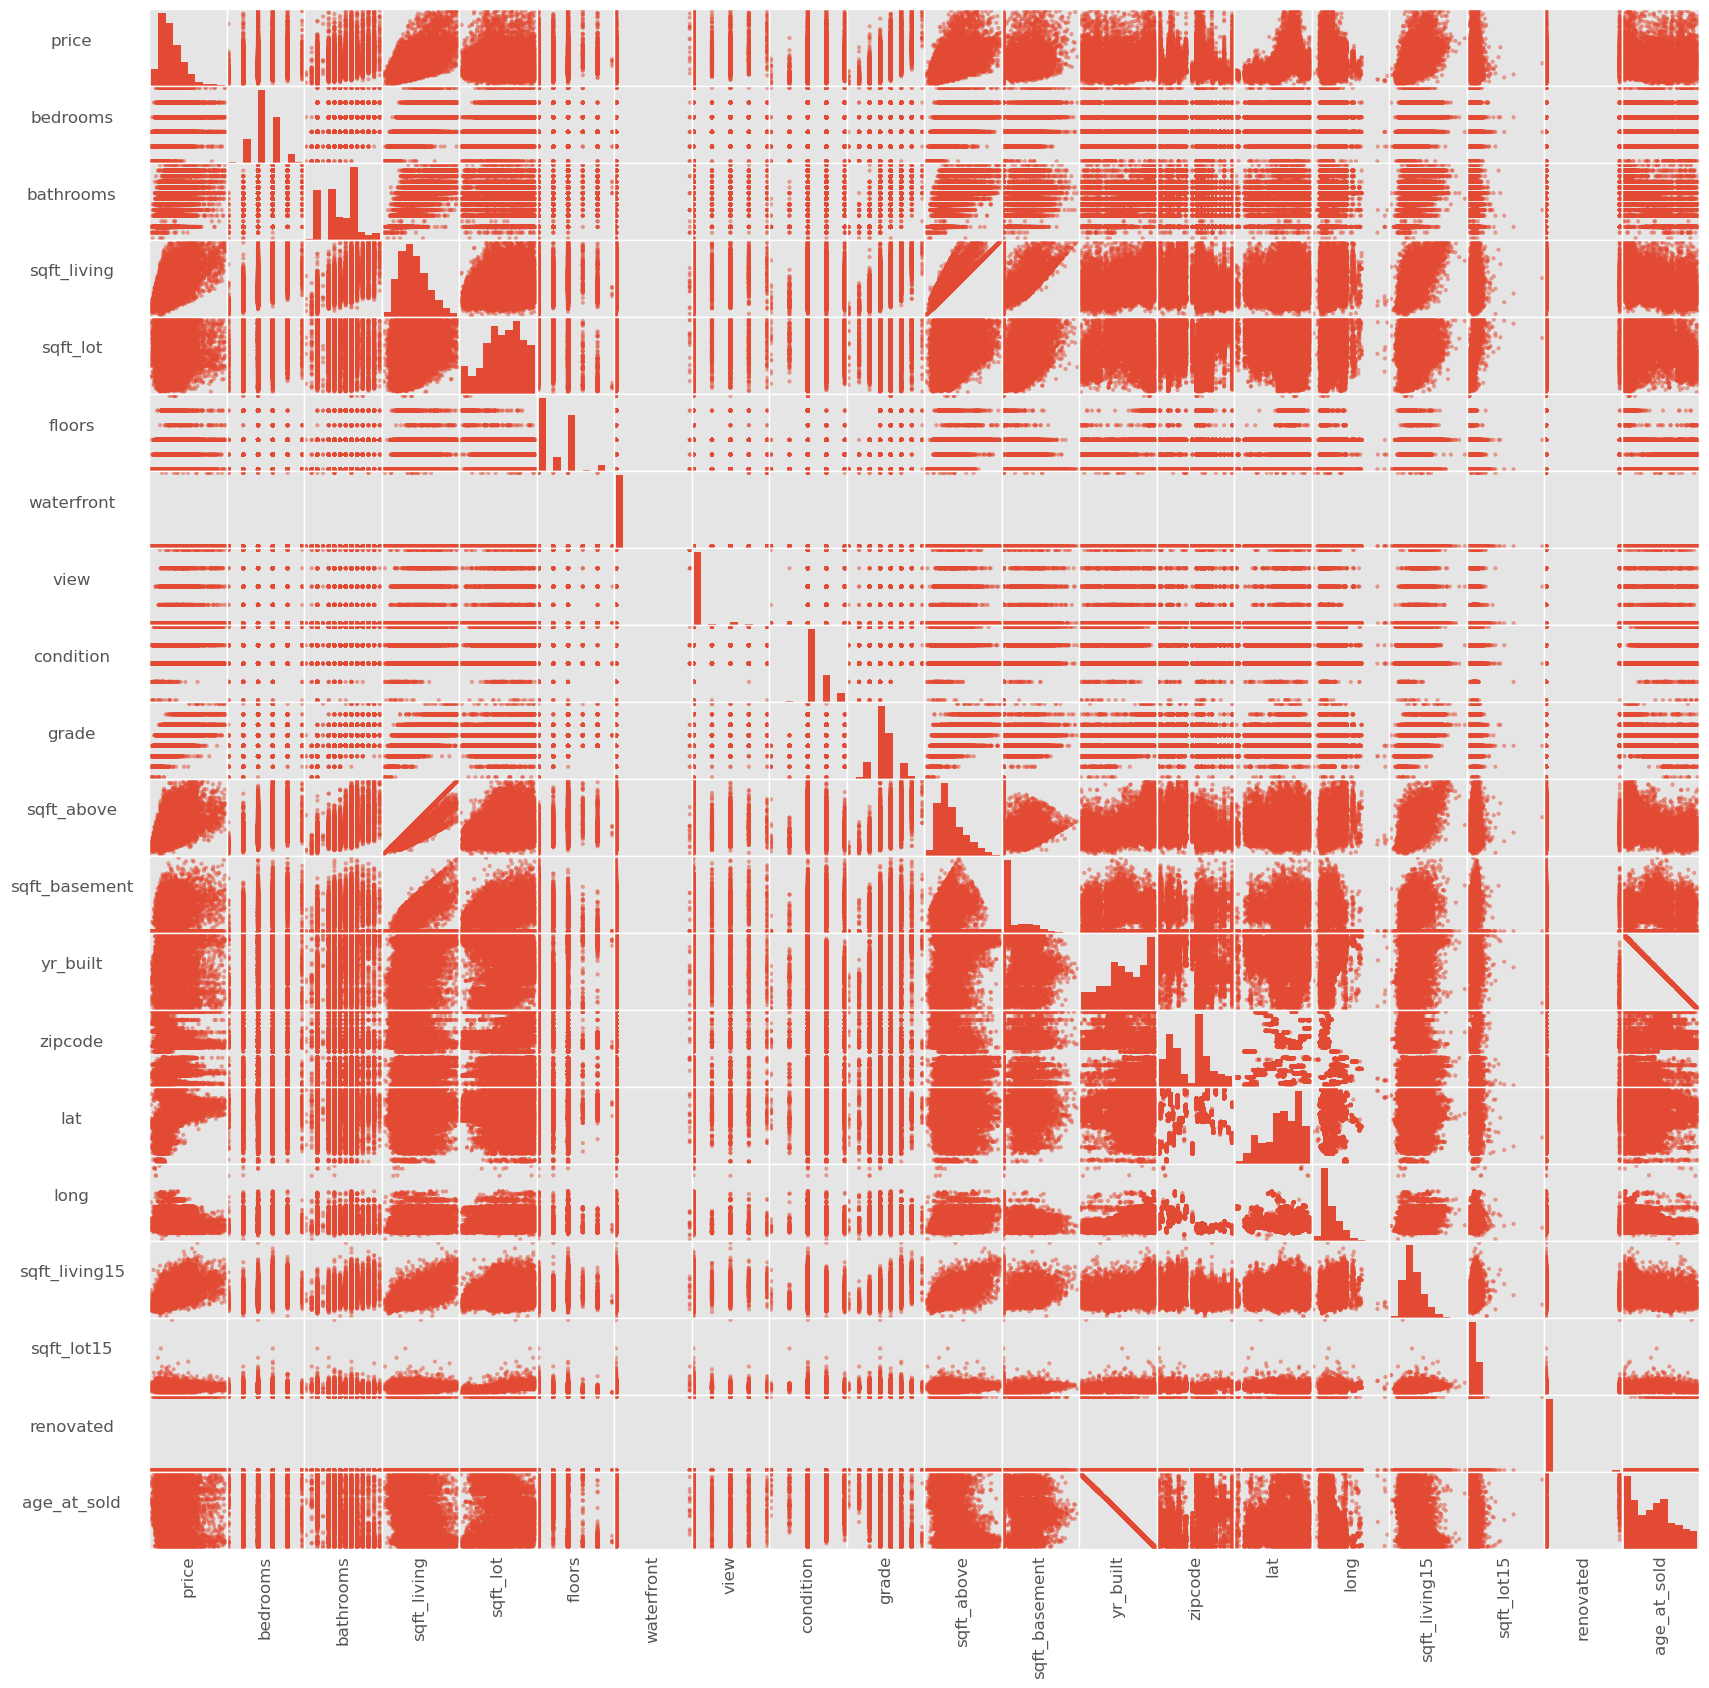

In [63]:
sm = pd.plotting.scatter_matrix(df, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

### Correlation matrix

In [64]:
#Correlation matrix
df.corr(numeric_only=True)

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.270020   0.401291     0.582435 -0.091096  0.258474   
bedrooms       0.270020  1.000000   0.484538     0.628025  0.230280  0.159391   
bathrooms      0.401291  0.484538   1.000000     0.701893 -0.092625  0.533343   
sqft_living    0.582435  0.628025   0.701893     1.000000  0.171210  0.343853   
sqft_lot      -0.091096  0.230280  -0.092625     0.171210  1.000000 -0.449486   
floors         0.258474  0.159391   0.533343     0.343853 -0.449486  1.000000   
waterfront     0.062988 -0.026551  -0.009154    -0.006088  0.007880  0.003375   
view           0.288403  0.031689   0.082679     0.160663  0.024788 -0.004820   
condition      0.062857  0.015076  -0.152621    -0.069797  0.143082 -0.284153   
grade          0.600733  0.325391   0.608525     0.670470 -0.047194  0.487685   
sqft_above     0.456314  0.507400   0.626796     0.840791  0.136252  0.537249   
sqft_basement  0.269508  0.262739   0.194036     0.365580  0.077200 -0.294297   
yr_built      -0.033115  0.165549   0.555123     0.328073 -0.089224  0.523722   
zipcode        0.058303 -0.169524  -0.225719    -0.192169 -0.245899 -0.083009   
lat            0.443162 -0.075943  -0.041972    -0.005617 -0.191920  0.022036   
long          -0.030962  0.168526   0.263014     0.264305  0.219901  0.150705   
sqft_living15  0.483158  0.403860   0.519489     0.728039  0.199125  0.275359   
sqft_lot15    -0.096889  0.180471  -0.089923     0.132528  0.832437 -0.394623   
renovated      0.107844  0.003951   0.026586     0.031777 -0.014106 -0.006285   
age_at_sold    0.033206 -0.165735  -0.555538    -0.328501  0.089285 -0.523947   

               waterfront      view  condition     grade  sqft_above  \
price            0.062988  0.288403   0.062857  0.600733    0.456314   
bedrooms        -0.026551  0.031689   0.015076  0.325391    0.507400   
bathrooms       -0.009154  0.082679  -0.152621  0.608525    0.626796   
sqft_living     -0.006088  0.160663  -0.069797  0.670470    0.840791   
sqft_lot         0.007880  0.024788   0.143082 -0.047194    0.136252   
floors           0.003375 -0.004820  -0.284153  0.487685    0.537249   
waterfront       1.000000  0.200719   0.008267 -0.006307   -0.007722   
view             0.200719  1.000000   0.041764  0.144080    0.052810   
condition        0.008267  0.041764   1.000000 -0.179764   -0.195686   
grade           -0.006307  0.144080  -0.179764  1.000000    0.667652   
sqft_above      -0.007722  0.052810  -0.195686  0.667652    1.000000   
sqft_basement    0.002646  0.198266   0.203915  0.069011   -0.188163   
yr_built        -0.016596 -0.091983  -0.381176  0.470614    0.461067   
zipcode          0.017435  0.131181   0.022597 -0.162900   -0.288266   
lat             -0.005560  0.036993   0.019436  0.086863   -0.083006   
long            -0.005365 -0.098725  -0.116993  0.190675    0.403712   
sqft_living15    0.010680  0.184495  -0.129174  0.618387    0.716109   
sqft_lot15       0.051694  0.041434   0.129770 -0.040649    0.102508   
renovated        0.029324  0.073426  -0.052992  0.007918   -0.001392   
age_at_sold      0.016707  0.092116   0.380359 -0.471129   -0.461333   

               sqft_basement  yr_built   zipcode       lat      long  \
price               0.269508 -0.033115  0.058303  0.443162 -0.030962   
bedrooms            0.262739  0.165549 -0.169524 -0.075943  0.168526   
bathrooms           0.194036  0.555123 -0.225719 -0.041972  0.263014   
sqft_living         0.365580  0.328073 -0.192169 -0.005617  0.264305   
sqft_lot            0.077200 -0.089224 -0.245899 -0.191920  0.219901   
floors             -0.294297  0.523722 -0.083009  0.022036  0.150705   
waterfront          0.002646 -0.016596  0.017435 -0.005560 -0.005365   
view                0.198266 -0.091983  0.131181  0.036993 -0.098725   
condition           0.203915 -0.381176  0.022597  0.019436 -0.116993   
grade               0.069011  0.470614 -0.162900  0.086863  0.190675   
sqft_above 

In [65]:
#Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix:
abs(df.corr(numeric_only=True)) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False        False     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False        False     False   False   
sqft_lot15     False     False      False        False      True   False   
renovated      False     False      False        False     False   False   
age_at_sold    False     False      False        False     False   False   

               waterfront   view  condition  grade  sqft_above  sqft_basement  \
price               False  False      False  False       False          False   
bedrooms            False  False      False  False       False          False   
bathrooms           False  False      False  False       False          False   
sqft_living         False  False      False  False        True          False   
sqft_lot            False  False      False  False       False          False   
floors              False  False      False  False       False          False   
waterfront           True  False      False  False       False          False   
view                False   True      False  False       False          False   
condition           False  False       True  False       False          False   
grade               False  False      False   True       False          False   
sqft_above          False  False      False  False        True          False   
sqft_basement       False  False      False  False       False           True   
yr_built            False  False      False  False       False          False   
zipcode             False  False      False  False       False          False   
lat                 False  False      False  False       False          False   
long                False  False      False  False       False          False   
sqft_living15       False  False      False  False       False          False   
sqft_lot15          False  False      False  False       False          False   
renovated           False  False      False  False       False          False   
age_at_sold         False  False      False  False       False          False   

               yr_built  zipcode    lat   long  sqft_living15  sqft_lot15  \
price             False    False  False  False          False       False   
bedrooms          False    False  False  False          False       False   
bathrooms         False    False  False  False          False       False   
sqft_living       False    False  False  False          False       False   
sqft_lot          False    False  False  False          False        True   
floors            False    False  False  False          False       False   
waterfront        False    False  False  False          False       False   
view              False    False  False  False          False       False   
condition         False

Now, include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [66]:
df1 = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)


df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.75) & (df1.cc<1)]


cc
pairs                              
(age_at_sold, yr_built)    0.999890
(sqft_above, sqft_living)  0.840791
(sqft_lot, sqft_lot15)     0.832437


### There are three sets of variales that are highly correlated.

- age_at_sold with yr_built
- sqft_above with sqft_living  
- sqft_lot15 with sqft_lot).



Did not removed any variables yet

### Heatmap

In [67]:
# View columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'age_at_sold'],
      dtype='object')

In [68]:
# Create a list of continuous and ordinal categorical features
cont_ordinal = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade','sqft_living', 'sqft_lot15','sqft_living15','sqft_basement','sqft_above','sqft_lot','lat', 'long','view','yr_built']

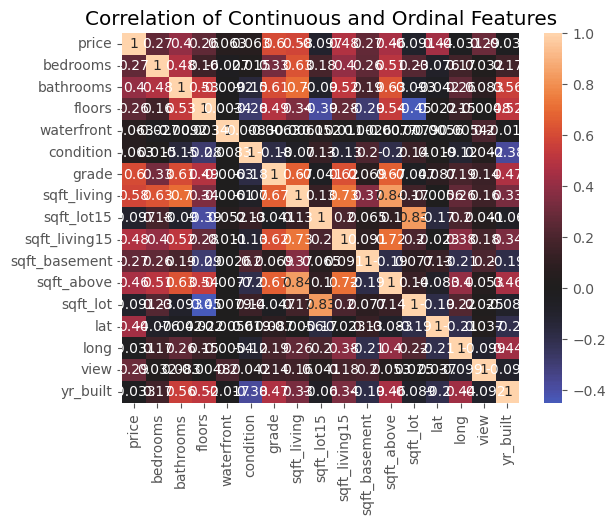

In [69]:
# Correlation heat map with continuous and ordinal features
corr = df[cont_ordinal].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous and Ordinal Features');

In [70]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0         0.0   
1      538000         3       2.25         2570      7242     2.0         0.0   
2      180000         2       1.00          770     10000     1.0         0.0   
3      604000         4       3.00         1960      5000     1.0         0.0   
4      510000         3       2.00         1680      8080     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50         1530      1131     3.0         0.0   
21593  400000         4       2.50         2310      5813     2.0         0.0   
21594  402101         2       0.75         1020      1350     2.0         0.0   
21595  400000         3       2.50         1600      2388     2.0         0.0   
21596  325000         2       0.75         1020      1076     2.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0       0.0          3      7        1180            0.0      1955    98178   
1       0.0          3      7        2170          400.0      1951    98125   
2       0.0          3      6         770            0.0      1933    98028   
3       0.0          5      7        1050          910.0      1965    98136   
4       0.0          3      8        1680            0.0      1987    98074   
...     ...        ...    ...         ...            ...       ...      ...   
21592   0.0          3      8        1530            0.0      2009    98103   
21593   0.0          3      8        2310            0.0      2014    98146   
21594   0.0          3      7        1020            0.0      2009    98144   
21595   0.0          3      8        1600            0.0      2004    98027   
21596   0.0          3      7        1020            0.0      2008    98144   

           lat     long  sqft_living15  sqft_lot15  renovated  age_at_sold  
0      47.5112 -122.257           1340        5650          0           59  
1      47.7210 -122.319           1690        7639          1           63  
2      47.7379 -122.233           2720        8062          0           82  
3      47.5208 -122.393           1360        5000          0           49  
4      47.6168 -122.045           1800        7503          0           28  
...        ...      ...            ...         ...        ...          ...  
21592  47.6993 -122.346           1530        1509          0            5  
21593  47.5107 -122.362           1830        7200          0            1  
21594  47.5944 -122.299           1020        2007          0            5  
21595  47.5345 -122.069           1410        1287          0           11  
21596  47.5941 -122.299           1020        1357          0            6  

[15334 rows x 20 columns]

Can see a correlatation between (sqft_above, sqft_living) is 0.840791 and (sqft_lot15, sqft_lot) is 0.83243

**Double checking for null values**

In [71]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0         0.0   
1      538000         3       2.25         2570      7242     2.0         0.0   
2      180000         2       1.00          770     10000     1.0         0.0   
3      604000         4       3.00         1960      5000     1.0         0.0   
4      510000         3       2.00         1680      8080     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50         1530      1131     3.0         0.0   
21593  400000         4       2.50         2310      5813     2.0         0.0   
21594  402101         2       0.75         1020      1350     2.0         0.0   
21595  400000         3       2.50         1600      2388     2.0         0.0   
21596  325000         2       0.75         1020      1076     2.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0       0.0          3      7        1180            0.0      1955    98178   
1       0.0          3      7        2170          400.0      1951    98125   
2       0.0          3      6         770            0.0      1933    98028   
3       0.0          5      7        1050          910.0      1965    98136   
4       0.0          3      8        1680            0.0      1987    98074   
...     ...        ...    ...         ...            ...       ...      ...   
21592   0.0          3      8        1530            0.0      2009    98103   
21593   0.0          3      8        2310            0.0      2014    98146   
21594   0.0          3      7        1020            0.0      2009    98144   
21595   0.0          3      8        1600            0.0      2004    98027   
21596   0.0          3      7        1020            0.0      2008    98144   

           lat     long  sqft_living15  sqft_lot15  renovated  age_at_sold  
0      47.5112 -122.257           1340        5650          0           59  
1      47.7210 -122.319           1690        7639          1           63  
2      47.7379 -122.233           2720        8062          0           82  
3      47.5208 -122.393           1360        5000          0           49  
4      47.6168 -122.045           1800        7503          0           28  
...        ...      ...            ...         ...        ...          ...  
21592  47.6993 -122.346           1530        1509          0            5  
21593  47.5107 -122.362           1830        7200          0            1  
21594  47.5944 -122.299           1020        2007          0            5  
21595  47.5345 -122.069           1410        1287          0           11  
21596  47.5941 -122.299           1020        1357          0            6  

[15334 rows x 20 columns]

In [72]:
#check for null values
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             43
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
renovated         0
age_at_sold       0
dtype: int64

In [73]:
#view has 43 null values 
df['view'].value_counts()

0.0    14249
2.0      550
3.0      221
1.0      190
4.0       81
Name: view, dtype: int64

In [74]:
df['view'].mean()


0.1489111241907004

In [75]:
df['view'].median()


0.0

In [76]:
df['view'].fillna(df['view'].median(),inplace=True)

In [77]:
df.view.isnull().sum()

0

### MODEL

<font color='red' > The modeling phase involves selecting appropriate algorithms to analyze the data. This phase usually involves training and testing a model.  </font>

# MODEL 1 

In [78]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0         0.0   
1      538000         3       2.25         2570      7242     2.0         0.0   
2      180000         2       1.00          770     10000     1.0         0.0   
3      604000         4       3.00         1960      5000     1.0         0.0   
4      510000         3       2.00         1680      8080     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50         1530      1131     3.0         0.0   
21593  400000         4       2.50         2310      5813     2.0         0.0   
21594  402101         2       0.75         1020      1350     2.0         0.0   
21595  400000         3       2.50         1600      2388     2.0         0.0   
21596  325000         2       0.75         1020      1076     2.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0       0.0          3      7        1180            0.0      1955    98178   
1       0.0          3      7        2170          400.0      1951    98125   
2       0.0          3      6         770            0.0      1933    98028   
3       0.0          5      7        1050          910.0      1965    98136   
4       0.0          3      8        1680            0.0      1987    98074   
...     ...        ...    ...         ...            ...       ...      ...   
21592   0.0          3      8        1530            0.0      2009    98103   
21593   0.0          3      8        2310            0.0      2014    98146   
21594   0.0          3      7        1020            0.0      2009    98144   
21595   0.0          3      8        1600            0.0      2004    98027   
21596   0.0          3      7        1020            0.0      2008    98144   

           lat     long  sqft_living15  sqft_lot15  renovated  age_at_sold  
0      47.5112 -122.257           1340        5650          0           59  
1      47.7210 -122.319           1690        7639          1           63  
2      47.7379 -122.233           2720        8062          0           82  
3      47.5208 -122.393           1360        5000          0           49  
4      47.6168 -122.045           1800        7503          0           28  
...        ...      ...            ...         ...        ...          ...  
21592  47.6993 -122.346           1530        1509          0            5  
21593  47.5107 -122.362           1830        7200          0            1  
21594  47.5944 -122.299           1020        2007          0            5  
21595  47.5345 -122.069           1410        1287          0           11  
21596  47.5941 -122.299           1020        1357          0            6  

[15334 rows x 20 columns]

In [79]:
train, test = train_test_split(df, random_state = 150)
train.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
16187  447000         2       1.00          720      7500     1.0         0.0   
6767   809000         4       1.75         1790      8372     1.0         0.0   
17872  217000         2       1.00          720      4760     1.0         0.0   
20242  778983         4       2.50         2490      5647     2.0         0.0   
5748   387000         2       2.25         1230      1280     2.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
16187   2.0          3      6         720            0.0      1925    98136   
6767    0.0          4      8        1340          450.0      1976    98033   
17872   0.0          5      5         720            0.0      1942    98056   
20242   0.0          3      8        2490            0.0      2014    98052   
5748    0.0          3      8         960          270.0      2012    98144   

           lat     long  sqft_living15  sqft_lot15  renovated  age_at_sold  
16187  47.5185 -122.392           1390        5000          0           90  
6767   47.6605 -122.189           2180       10500          0           39  
17872  47.4960 -122.186            840        4760          0           72  
20242  47.7043 -122.114           2970        5450          0            0  
5748   47.5942 -122.298           1130        1357          0            2

In [80]:
# Create model function to fit a linear regression that includes rmse
def model1(train, test):
  
  target = 'price'
  x_cols = list(train.columns)
  x_cols.remove('price')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['price'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['price'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [81]:
model1(train, test).summary()

Train RMSE:  122255.66801937918
Test RMSE:  121587.4592701153 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1452.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:17   Log-Likelihood:            -1.5103e+05
No. Observations:               11500   AIC:                         3.021e+05
Df Residuals:                   11480   BIC:                         3.022e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.992e+07   5.56e+06     -8.978      0.000   -6.08e+07    -3.9e+07
bedrooms      -1.414e+04   1810.270     -7.813      0.000   -1.77e+04   -1.06e+04
bathrooms      2.156e+04   2917.233      7.389      0.000    1.58e+04    2.73e+04
sqft_living     118.0345     18.503      6.379      0.000      81.766     154.303
sqft_lot         -6.1074      0.923     -6.617      0.000      -7.917      -4.298
floors         7886.2621   3564.781      2.212      0.027     898.684    1.49e+04
waterfront     3.259e+05   3.77e+04      8.649      0.000    2.52e+05       4e+05
view           4.287e+04   2094.430     20.470      0.000    3.88e+04     4.7e+04
condition      2.709e+04   1978.907     13.688      0.000    2.32e+04     3.1e+04
grade          8.953e+04   1926.123     46.485      0.000    8.58e+04    9.33e+04
sqft_above       -3.3708     18.502     -0.182      0.855     -39.638      32.897
sqft_basement   -13.4485     18.286     -0.735      0.462     -49.292      22.395
yr_built       2.031e+04   2444.861      8.305      0.000    1.55e+04    2.51e+04
zipcode        -263.1826     28.728     -9.161      0.000    -319.495    -206.871
lat            5.616e+05   9316.830     60.277      0.000    5.43e+05     5.8e+05
long          -6.137e+04   1.22e+04     -5.040      0.000   -8.52e+04   -3.75e+04
sqft_living15    40.8444      3.442     11.866      0.000      34.097      47.592
sqft_lot15       -4.3054      0.761     -5.661      0.000      -5.796      -2.815
renovated      2.917e+04   6905.832      4.224      0.000    1.56e+04    4.27e+04
age_at_sold    2.246e+04   2444.023      9.190      0.000    1.77e+04    2.73e+04
==============================================================================
Omnibus:                     2292.811   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7785.939
Skew:                           0.995   Prob(JB):                         0.00
Kurtosis:                       6.506   Cond. No.                     4.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Initial model has a **R-squared of 0.706** suggests that the model explains a significant portion (70.6%) of the variance in the dependent variable, which often means that the model could be useful for predictions. However this can be improved !

A **skewness value of 0.995** is a moderate positive skew, suggesting that there are somewhat more low values and fewer high values, and the "tail" of the distribution stretches more towards the right (higher values).

A **kurtosis value of 6.506** is greater than 3, indicating a leptokurtic distribution. This suggests that the dataset has more extreme values, or outliers, than we would expect from a normal distribution. It implies that the tails of the distribution are relatively heavy, and that data points are more likely to be found far from the mean compared to a normally distributed dataset.

# MODEL 2

In [82]:
print(train.columns)
print(test.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'age_at_sold'],
      dtype='object')
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'age_at_sold'],
      dtype='object')


In [83]:
# code from the Appendix lab: Modeling Your Data
# remove features with p_value less than 0.05
model2 = model1(train, test).summary()
p_table = model2.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
sig = list(p_table[p_table['P>|t|'] < 0.05].index)
sig.remove('Intercept')
print("Total # features: ", len(p_table))
print("Total significant features", len(sig))
p_table.head()

Train RMSE:  122255.66801937918
Test RMSE:  121587.4592701153 

Total # features:  20
Total significant features 17


0                  coef    std err          t  P>|t|     [0.025     0.975]
                                                                          
Intercept    -4.992e+07   5.56e+06     -8.978    0.0  -6.08e+07   -3.9e+07
bedrooms     -1.414e+04   1810.270     -7.813    0.0  -1.77e+04  -1.06e+04
bathrooms     2.156e+04   2917.233      7.389    0.0   1.58e+04   2.73e+04
sqft_living    118.0345     18.503      6.379    0.0     81.766    154.303
sqft_lot        -6.1074      0.923     -6.617    0.0     -7.917     -4.298

In [84]:
# Gathering together significant features
train, test = train[sig+['price']], test[sig+['price']]

In [85]:
# Applying only features with a p_value less than 0.05
model2 = model1(train, test)
model2.summary()

Train RMSE:  122284.7267523019
Test RMSE:  121596.23044719924 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:17   Log-Likelihood:            -1.5103e+05
No. Observations:               11500   AIC:                         3.021e+05
Df Residuals:                   11482   BIC:                         3.022e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.914e+07   5.55e+06     -8.854      0.000      -6e+07   -3.83e+07
bedrooms      -1.415e+04   1810.415     -7.815      0.000   -1.77e+04   -1.06e+04
bathrooms      2.036e+04   2867.004      7.100      0.000    1.47e+04     2.6e+04
sqft_living     110.7889      3.496     31.688      0.000     103.936     117.642
sqft_lot         -5.7416      0.908     -6.322      0.000      -7.522      -3.961
floors         1.189e+04   3066.633      3.876      0.000    5875.209    1.79e+04
waterfront     3.261e+05   3.77e+04      8.653      0.000    2.52e+05       4e+05
view           4.227e+04   2075.824     20.361      0.000    3.82e+04    4.63e+04
condition      2.664e+04   1968.122     13.537      0.000    2.28e+04    3.05e+04
grade          8.989e+04   1919.873     46.823      0.000    8.61e+04    9.37e+04
yr_built       2.031e+04   2445.193      8.306      0.000    1.55e+04    2.51e+04
zipcode        -263.7018     28.731     -9.178      0.000    -320.020    -207.384
lat            5.595e+05   9266.046     60.377      0.000    5.41e+05    5.78e+05
long          -5.612e+04   1.19e+04     -4.699      0.000   -7.95e+04   -3.27e+04
sqft_living15    42.2596      3.382     12.495      0.000      35.630      48.889
sqft_lot15       -4.3441      0.760     -5.712      0.000      -5.835      -2.853
renovated      2.914e+04   6906.844      4.220      0.000    1.56e+04    4.27e+04
age_at_sold    2.246e+04   2444.354      9.190      0.000    1.77e+04    2.73e+04
==============================================================================
Omnibus:                     2296.870   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7827.477
Skew:                           0.995   Prob(JB):                         0.00
Kurtosis:                       6.518   Cond. No.                     4.79e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing features with p_value less than 0.05 which was for sqft_above and sqft_basement. There Was'nt that much difference in the model 2 compared to model 1

## Check assumptions

### Prepare Continuous Data for Modeling: Checking Linearity

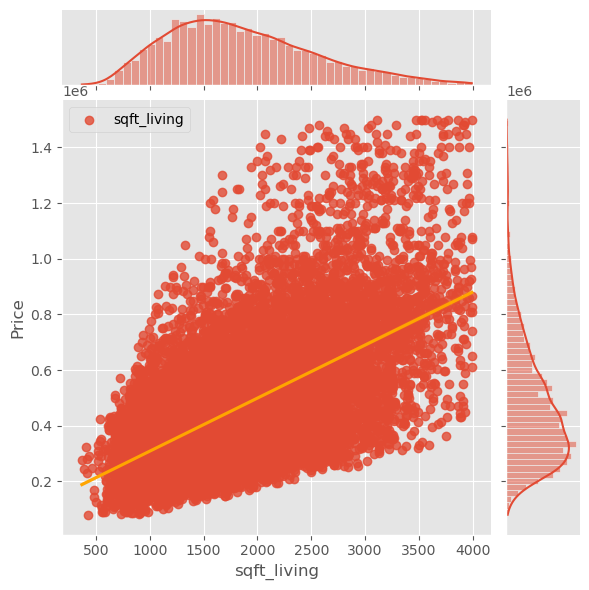

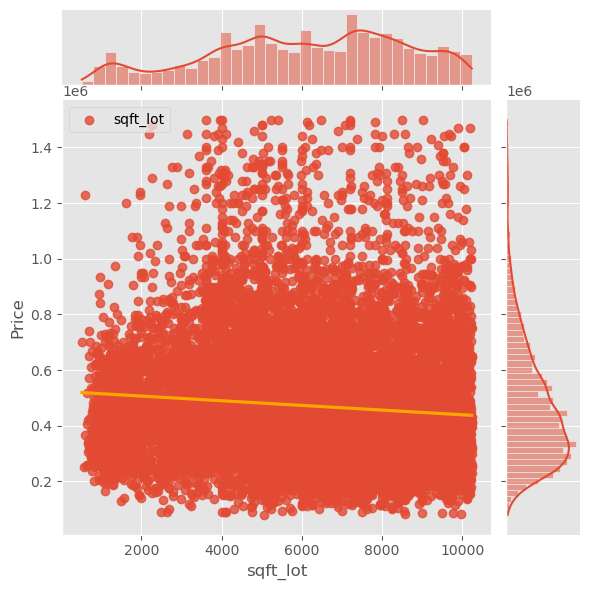

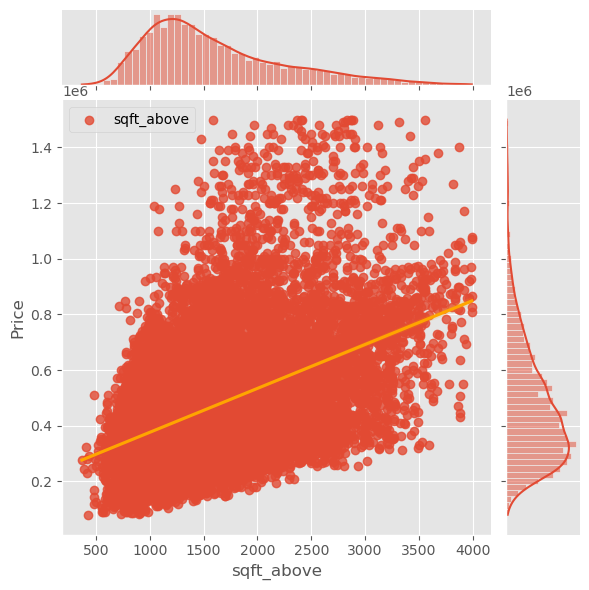

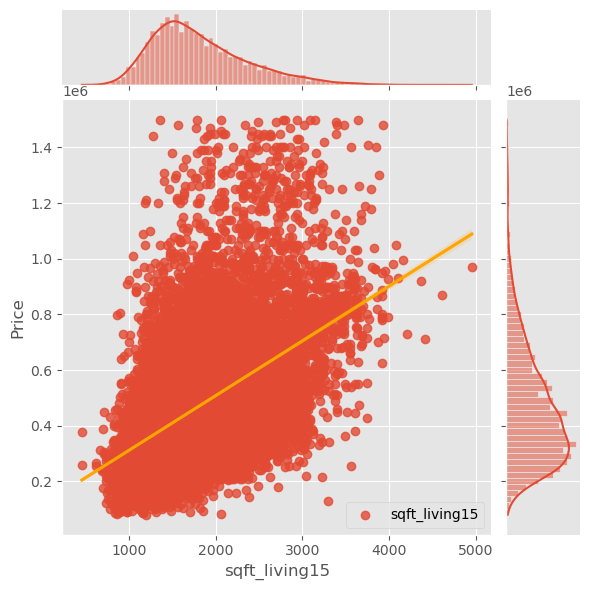

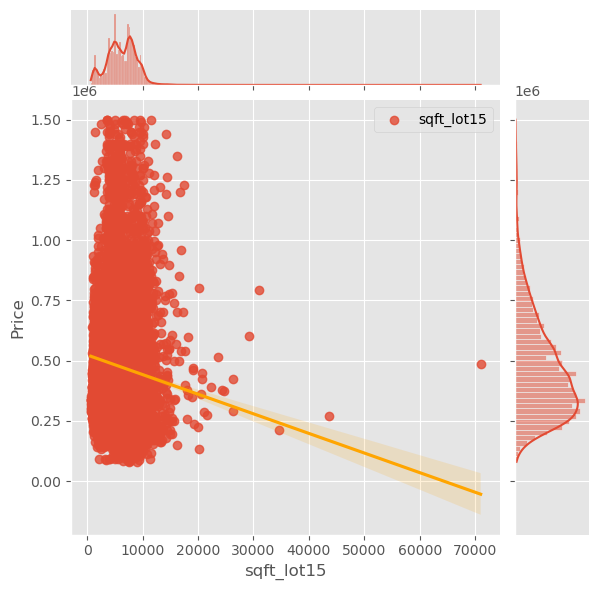

In [86]:
# Select and visualize continuous data (data that can take any value)
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']

for column in continuous:
    sns.jointplot(x=column, y="price", data=df, kind='reg', label=column,joint_kws={'line_kws':{'color':'orange'}})
    
# Set y-axis label
    plt.ylabel('Price')

    plt.legend()
    plt.show()

In [87]:
df['sqft_living'].median()

1760.0

In [88]:
df['sqft_living15'].median()

1710.0

In [89]:
df['sqft_above'].median()

1440.0

Modeling Observations:

sqft_living, sqft_above, sqft_lot15 all have a positive linear relationship with our target variable (price).
Since continuous predictors have high multicolinearity (as addressed previously) I will use only sqft_living

# MODEL 3 - addressed multicollinearity

In [90]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0         0.0   
1      538000         3       2.25         2570      7242     2.0         0.0   
2      180000         2       1.00          770     10000     1.0         0.0   
3      604000         4       3.00         1960      5000     1.0         0.0   
4      510000         3       2.00         1680      8080     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50         1530      1131     3.0         0.0   
21593  400000         4       2.50         2310      5813     2.0         0.0   
21594  402101         2       0.75         1020      1350     2.0         0.0   
21595  400000         3       2.50         1600      2388     2.0         0.0   
21596  325000         2       0.75         1020      1076     2.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0       0.0          3      7        1180            0.0      1955    98178   
1       0.0          3      7        2170          400.0      1951    98125   
2       0.0          3      6         770            0.0      1933    98028   
3       0.0          5      7        1050          910.0      1965    98136   
4       0.0          3      8        1680            0.0      1987    98074   
...     ...        ...    ...         ...            ...       ...      ...   
21592   0.0          3      8        1530            0.0      2009    98103   
21593   0.0          3      8        2310            0.0      2014    98146   
21594   0.0          3      7        1020            0.0      2009    98144   
21595   0.0          3      8        1600            0.0      2004    98027   
21596   0.0          3      7        1020            0.0      2008    98144   

           lat     long  sqft_living15  sqft_lot15  renovated  age_at_sold  
0      47.5112 -122.257           1340        5650          0           59  
1      47.7210 -122.319           1690        7639          1           63  
2      47.7379 -122.233           2720        8062          0           82  
3      47.5208 -122.393           1360        5000          0           49  
4      47.6168 -122.045           1800        7503          0           28  
...        ...      ...            ...         ...        ...          ...  
21592  47.6993 -122.346           1530        1509          0            5  
21593  47.5107 -122.362           1830        7200          0            1  
21594  47.5944 -122.299           1020        2007          0            5  
21595  47.5345 -122.069           1410        1287          0           11  
21596  47.5941 -122.299           1020        1357          0            6  

[15334 rows x 20 columns]

In [91]:
#Removing multicolinearity variables (Address the colinearity)
df.drop(['sqft_above','sqft_lot15','age_at_sold'], axis= 1, inplace = True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3       1.00         1180      5650     1.0         0.0   
1  538000         3       2.25         2570      7242     2.0         0.0   
2  180000         2       1.00          770     10000     1.0         0.0   
3  604000         4       3.00         1960      5000     1.0         0.0   
4  510000         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_basement  yr_built  zipcode      lat     long  \
0   0.0          3      7            0.0      1955    98178  47.5112 -122.257   
1   0.0          3      7          400.0      1951    98125  47.7210 -122.319   
2   0.0          3      6            0.0      1933    98028  47.7379 -122.233   
3   0.0          5      7          910.0      1965    98136  47.5208 -122.393   
4   0.0          3      8            0.0      1987    98074  47.6168 -122.045   

   sqft_living15  renovated  
0           1340          0  
1           1690          1  
2           2720          0  
3           1360          0  
4           1800          0

In [92]:
train, test = train_test_split(df, random_state = 150)
train.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
16187  447000         2       1.00          720      7500     1.0         0.0   
6767   809000         4       1.75         1790      8372     1.0         0.0   
17872  217000         2       1.00          720      4760     1.0         0.0   
20242  778983         4       2.50         2490      5647     2.0         0.0   
5748   387000         2       2.25         1230      1280     2.0         0.0   

       view  condition  grade  sqft_basement  yr_built  zipcode      lat  \
16187   2.0          3      6            0.0      1925    98136  47.5185   
6767    0.0          4      8          450.0      1976    98033  47.6605   
17872   0.0          5      5            0.0      1942    98056  47.4960   
20242   0.0          3      8            0.0      2014    98052  47.7043   
5748    0.0          3      8          270.0      2012    98144  47.5942   

          long  sqft_living15  renovated  
16187 -122.392           1390          0  
6767  -122.189           2180          0  
17872 -122.186            840          0  
20242 -122.114           2970          0  
5748  -122.298           1130          0

In [93]:
# Create model function to fit a linear regression that includes rmse
def model(train, test):
  
  target = 'price'
  x_cols = list(train.columns)
  x_cols.remove('price')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['price'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['price'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [94]:
model(train, test).summary()

Train RMSE:  122874.48068419255
Test RMSE:  122673.49484315024 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1701.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:25   Log-Likelihood:            -1.5109e+05
No. Observations:               11500   AIC:                         3.022e+05
Df Residuals:                   11483   BIC:                         3.023e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.424e+06   2.53e+06     -1.747      0.081   -9.39e+06     5.4e+05
bedrooms      -1.404e+04   1818.999     -7.719      0.000   -1.76e+04   -1.05e+04
bathrooms      2.194e+04   2926.184      7.498      0.000    1.62e+04    2.77e+04
sqft_living     115.4947      3.902     29.602      0.000     107.847     123.142
sqft_lot         -9.8514      0.641    -15.367      0.000     -11.108      -8.595
floors         8499.5620   3547.739      2.396      0.017    1545.388    1.55e+04
waterfront     3.196e+05   3.79e+04      8.444      0.000    2.45e+05    3.94e+05
view           4.301e+04   2102.288     20.457      0.000    3.89e+04    4.71e+04
condition      2.568e+04   1982.959     12.950      0.000    2.18e+04    2.96e+04
grade          8.942e+04   1934.990     46.210      0.000    8.56e+04    9.32e+04
sqft_basement   -10.7853      4.406     -2.448      0.014     -19.422      -2.149
yr_built      -2178.2131     57.930    -37.600      0.000   -2291.767   -2064.659
zipcode        -262.4633     28.869     -9.091      0.000    -319.052    -205.874
lat            5.596e+05   9353.707     59.826      0.000    5.41e+05    5.78e+05
long           -5.99e+04   1.22e+04     -4.902      0.000   -8.39e+04   -3.59e+04
sqft_living15    38.4202      3.437     11.180      0.000      31.684      45.156
renovated      2.545e+04   6923.065      3.676      0.000    1.19e+04     3.9e+04
==============================================================================
Omnibus:                     2260.095   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7467.245
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       6.416   Cond. No.                     2.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After addressing the colinearity and droping 'sqft_above','sqft_lot15' columns there was'nt any improvement in terms of R2 square instead there was a reduction in 0.003



A skewness value of 0.989	 suggests a moderately right-skewed distribution. This means:

- Most of the data points are concentrated on the left side of the distribution.
- The tail of the distribution extends more towards the right, not the left.
- The mean is typically greater than the median in a positively skewed distribution.

Kurtosis of 6.416 is leptokurtic, meaning it has fatter tails and a sharper peak compared to a normal distribution. This would suggest:

- The data set has a higher propensity for outliers or extreme values than does a normal distribution.

- The distribution is more "peaked" than a normal distribution, implying that data points are more concentrated around the mean.

### NO SIGNIFICANT DIFFERENCES WERE FOUND IN MODEL 3 FROM MODEL 1 AFTER ADDRESSING THE MULTICOLLINEARITY 

## Log transformation and normalisation only in continuous data 

In [95]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0         0.0   
1      538000         3       2.25         2570      7242     2.0         0.0   
2      180000         2       1.00          770     10000     1.0         0.0   
3      604000         4       3.00         1960      5000     1.0         0.0   
4      510000         3       2.00         1680      8080     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50         1530      1131     3.0         0.0   
21593  400000         4       2.50         2310      5813     2.0         0.0   
21594  402101         2       0.75         1020      1350     2.0         0.0   
21595  400000         3       2.50         1600      2388     2.0         0.0   
21596  325000         2       0.75         1020      1076     2.0         0.0   

       view  condition  grade  sqft_basement  yr_built  zipcode      lat  \
0       0.0          3      7            0.0      1955    98178  47.5112   
1       0.0          3      7          400.0      1951    98125  47.7210   
2       0.0          3      6            0.0      1933    98028  47.7379   
3       0.0          5      7          910.0      1965    98136  47.5208   
4       0.0          3      8            0.0      1987    98074  47.6168   
...     ...        ...    ...            ...       ...      ...      ...   
21592   0.0          3      8            0.0      2009    98103  47.6993   
21593   0.0          3      8            0.0      2014    98146  47.5107   
21594   0.0          3      7            0.0      2009    98144  47.5944   
21595   0.0          3      8            0.0      2004    98027  47.5345   
21596   0.0          3      7            0.0      2008    98144  47.5941   

          long  sqft_living15  renovated  
0     -122.257           1340          0  
1     -122.319           1690          1  
2     -122.233           2720          0  
3     -122.393           1360          0  
4     -122.045           1800          0  
...        ...            ...        ...  
21592 -122.346           1530          0  
21593 -122.362           1830          0  
21594 -122.299           1020          0  
21595 -122.069           1410          0  
21596 -122.299           1020          0  

[15334 rows x 17 columns]

In [96]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.533400e+04  15334.000000  15334.000000  15334.000000  15334.000000   
mean   4.721766e+05      3.262880      2.007125   1857.591626   6097.929829   
std    2.240077e+05      0.852576      0.687194    684.015787   2427.995819   
min    8.000000e+04      1.000000      0.500000    370.000000    520.000000   
25%    3.090000e+05      3.000000      1.500000   1340.000000   4400.000000   
50%    4.250000e+05      3.000000      2.000000   1760.000000   6250.000000   
75%    5.847125e+05      4.000000      2.500000   2290.000000   8007.500000   
max    1.500000e+06      6.000000      3.750000   3990.000000  10232.000000   

             floors    waterfront          view     condition         grade  \
count  15334.000000  15334.000000  15334.000000  15334.000000  15334.000000   
mean       1.504695      0.001043      0.148494      3.396439      7.434655   
std        0.553630      0.032286      0.589970      0.649240      0.946216   
min        1.000000      0.000000      0.000000      1.000000      4.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     11.000000   

       sqft_basement      yr_built       zipcode           lat          long  \
count   15334.000000  15334.000000  15334.000000  15334.000000  15334.000000   
mean      245.549433   1969.639168  98085.442089     47.563443   -122.238692   
std       375.067694     31.674184     52.937856      0.136058      0.129858   
min         0.000000   1900.000000  98001.000000     47.189600   -122.512000   
25%         0.000000   1948.000000  98034.000000     47.483225   -122.344000   
50%         0.000000   1971.000000  98103.000000     47.574200   -122.283000   
75%       480.000000   2000.000000  98122.000000     47.679975   -122.164000   
max      2000.000000   2015.000000  98199.000000     47.777600   -121.319000   

       sqft_living15     renovated  
count   15334.000000  15334.000000  
mean     1817.723555      0.030781  
std       549.694025      0.172730  
min       460.000000      0.000000  
25%      1420.000000      0.000000  
50%      1710.000000      0.000000  
75%      2120.000000      0.000000  
max      4950.000000      1.000000

# MODEL 4 - USING LOG TRANSFORMATION FOR CONTINUOUS DATA

In [97]:
outcome = 'price'
x_cols = ['sqft_living','sqft_lot','sqft_living15','sqft_basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     2534.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:25   Log-Likelihood:            -2.0677e+05
No. Observations:               15334   AIC:                         4.136e+05
Df Residuals:                   15329   BIC:                         4.136e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.644e+05   5554.947     29.595      0.000    1.54e+05    1.75e+05
sqft_living     141.8809      3.330     42.602      0.000     135.353     148.409
sqft_lot        -19.7057      0.591    -33.336      0.000     -20.864     -18.547
sqft_living15    81.6155      3.901     20.922      0.000      73.969      89.262
sqft_basement    65.2759      4.186     15.595      0.000      57.071      73.480
==============================================================================
Omnibus:                     2414.066   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5066.425
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       5.087   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

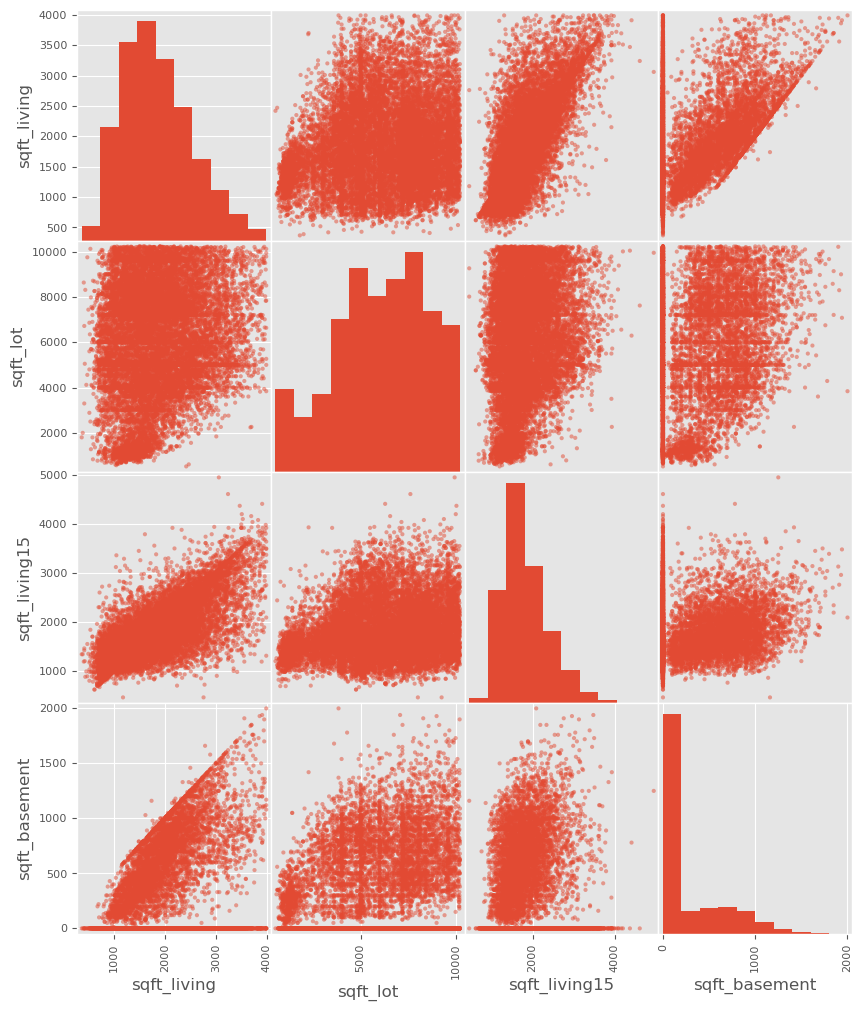

In [98]:
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

C:\Users\rani_\AppData\Local\Temp\ipykernel_14464\762412792.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


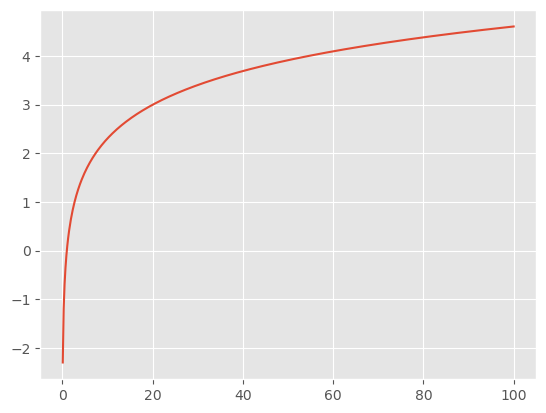

In [99]:
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

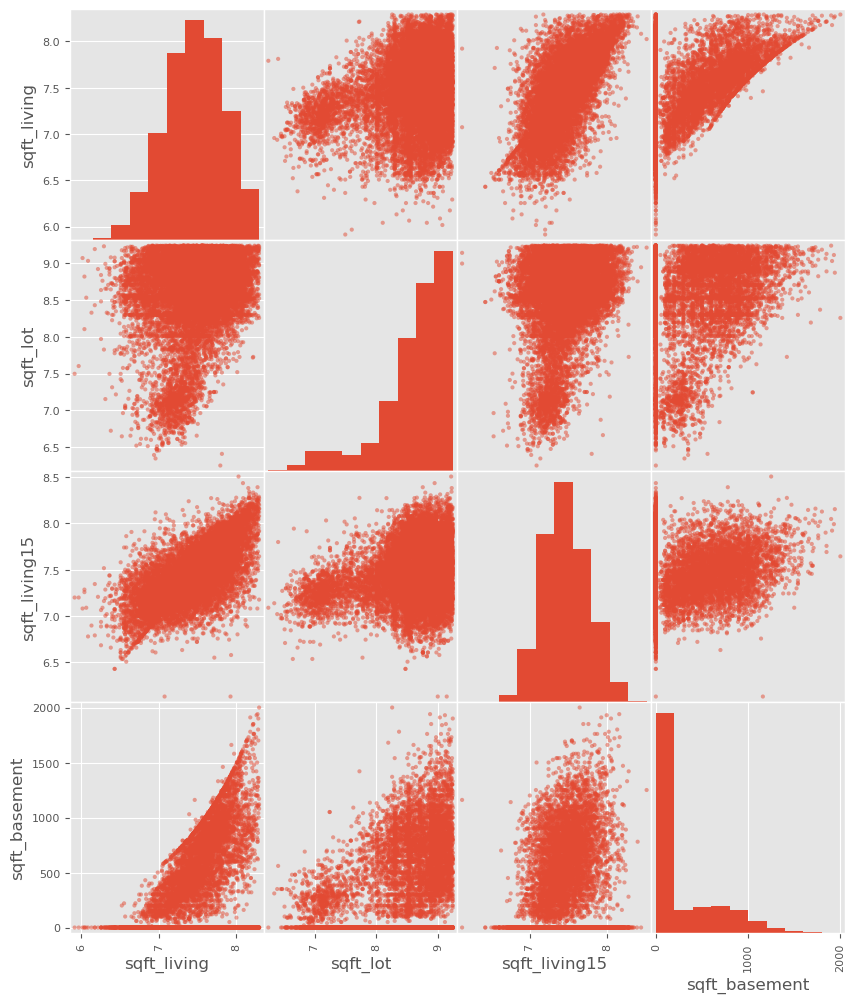

In [100]:
non_normal = ['sqft_living','sqft_lot','sqft_living15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [101]:
outcome = 'price'
x_cols = ['sqft_living','sqft_lot','sqft_living15','sqft_basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     2170.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:30   Log-Likelihood:            -2.0722e+05
No. Observations:               15334   AIC:                         4.145e+05
Df Residuals:                   15329   BIC:                         4.145e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.884e+06   4.02e+04    -46.863      0.000   -1.96e+06    -1.8e+06
sqft_living     2.24e+05   5952.604     37.623      0.000    2.12e+05    2.36e+05
sqft_lot       -7.83e+04   2710.864    -28.885      0.000   -8.36e+04    -7.3e+04
sqft_living15  1.798e+05   7254.859     24.789      0.000    1.66e+05    1.94e+05
sqft_basement    68.8601      4.277     16.099      0.000      60.476      77.244
==============================================================================
Omnibus:                     2590.857   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5385.142
Skew:                           1.011   Prob(JB):                         0.00
Kurtosis:                       5.083   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comparing OLS regression results before and after log transformation for continuous data** 

- The R-squared is 0.398 for the first model and 0.362 for the second, which means the model explains around 47-45% of the variability in price.
- The variable sqft_basement seems to be not statistically significant in both models (high p-value).
- Both models suffer from non-normality in the residuals, as evidenced by the Omnibus and JB tests.
- The condition number (Cond. No.) is lower in the second model, which might imply less multicollinearity.
- The increase in skewness from 0.946 to 1.011 indicates that the distribution has become more positively skewed, suggesting more frequent higher values in the dataset.
- The increase in kurtosis from 5.467 to 5.083	 suggests that the distribution has become more "tailed," indicating a higher likelihood of outliers or extreme values.

### INTERPRET 

<font color='red' > The final step is interpreting the results of the models.  </font>

## Summary of Models
	 			
- Model 1 ->  R- SQUARE = 0.706 , Number of Features = 19 , Best Model =✅	No change in data except dropped one column (ID)
- Model 2 ->  R- SQUARE = 0.706 , Number of Features = 17 , Best Model =✅	Removed P-value greater than 0.05 for 3 column (sqft_above and sqft_basement)
- Model 3 ->  R- SQUARE = 0.703 , Number of Features = 17 , Best Model =✅	Addressed multicollinearity and compared to Model 1
- Model 4 ->  R- SQUARE = 0.362	, Number of Features = 5  , Best Model =❌	Applied Log transformation only for continuous data 


# ANOTHER APPROACH ! 

## Let's first Standardize the variables

## MODEL 5 Using selected variables 

C:\Users\rani_\AppData\Local\Temp\ipykernel_14464\1073268049.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


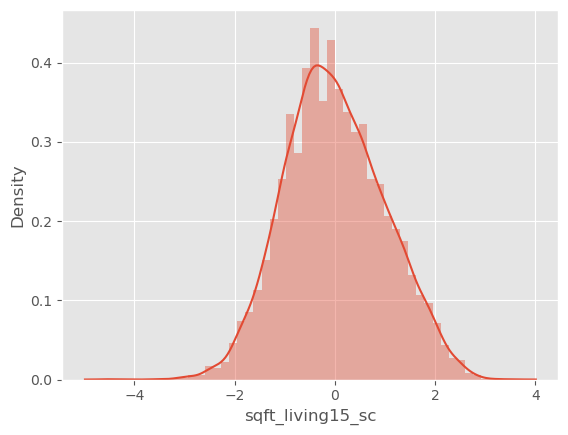

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_df = df['sqft_living15'].values.reshape(-1,1)
scale_df = scaler.fit_transform(col_df)
df['sqft_living15_sc'] = scale_df.flatten()

x = df['sqft_living15_sc']
ax = sns.distplot(x)

C:\Users\rani_\AppData\Local\Temp\ipykernel_14464\896630809.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


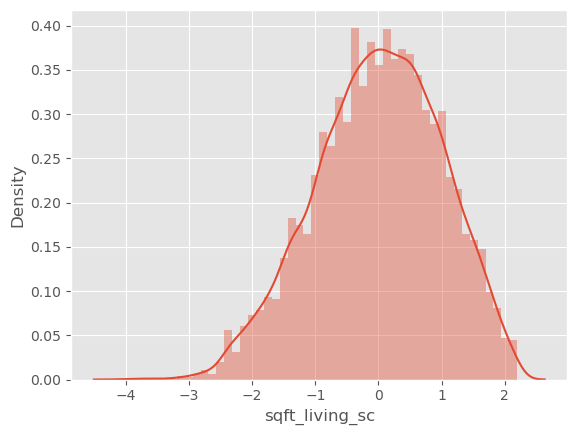

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_df = df['sqft_living'].values.reshape(-1,1)
scale_df = scaler.fit_transform(col_df)
df['sqft_living_sc'] = scale_df.flatten()

x = df['sqft_living_sc']
ax = sns.distplot(x)

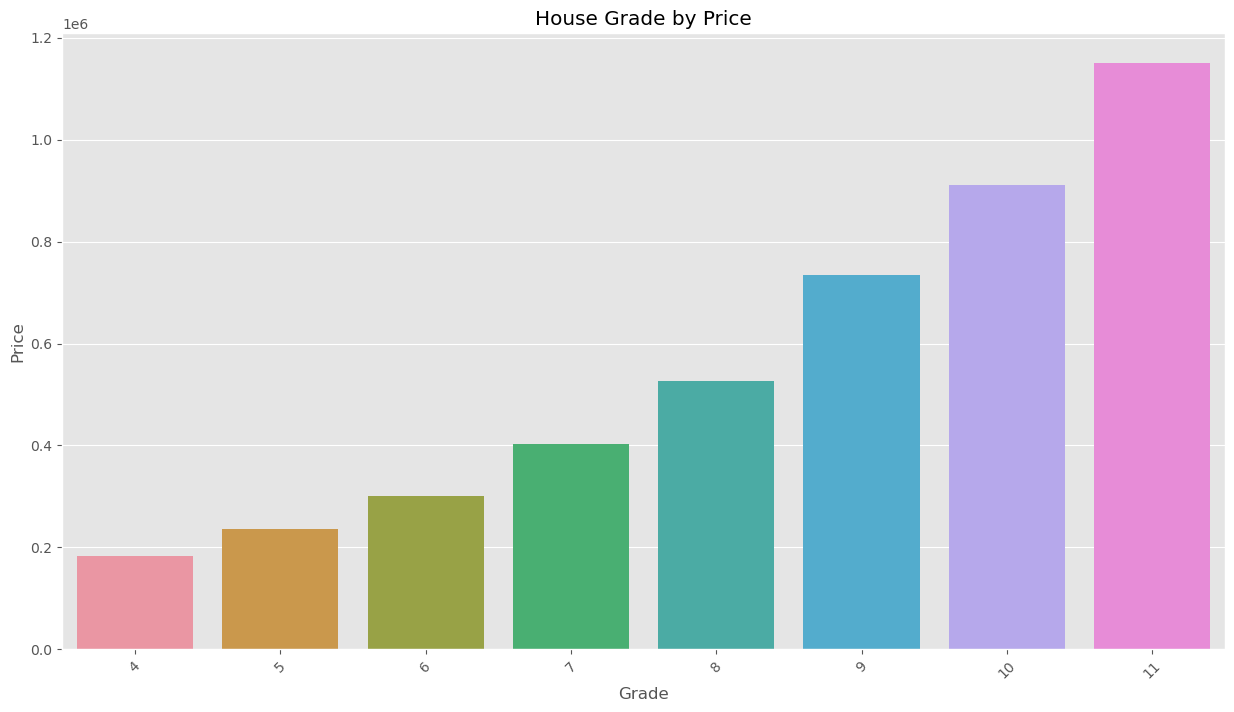

In [124]:
plt.figure(figsize=(15, 8))
sns.barplot(x='grade', y='price', data=df, errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('House Grade by Price')
plt.show()

Building grade:

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

The visualization above shows that when the building grade improves, the house price rises as well. We can see in the bar plot that the mean house price for a home with a grade of 11 is far above other grades. While the building grade of 4 falls short of minimum building standards based on the King County grading system.


C:\Users\rani_\AppData\Local\Temp\ipykernel_14464\3865672094.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


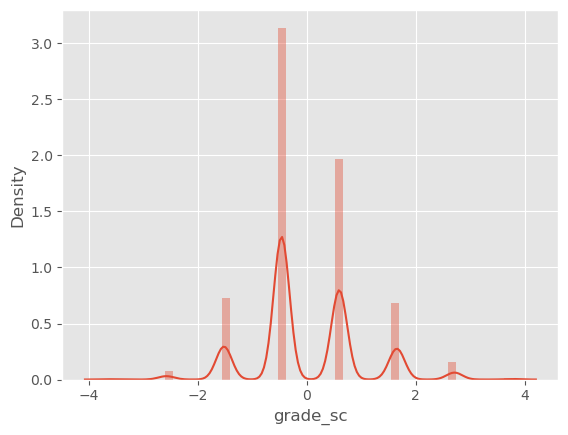

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_df = df['grade'].values.reshape(-1,1)
scale_df = scaler.fit_transform(col_df)
df['grade_sc'] = scale_df.flatten()

x = df['grade_sc']
ax = sns.distplot(x)

In [106]:
f = 'price~grade_sc+sqft_living_sc+sqft_living15_sc'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     3460.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:32   Log-Likelihood:            -2.0670e+05
No. Observations:               15334   AIC:                         4.134e+05
Df Residuals:                   15330   BIC:                         4.134e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.722e+05   1397.045    337.982      0.000    4.69e+05    4.75e+05
grade_sc          9.106e+04   1934.308     47.075      0.000    8.73e+04    9.48e+04
sqft_living_sc    5.414e+04   2178.768     24.848      0.000    4.99e+04    5.84e+04
sqft_living15_sc  1.245e+04   2050.301      6.073      0.000    8432.070    1.65e+04
==============================================================================
Omnibus:                     2142.294   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3825.446
Skew:                           0.914   Prob(JB):                         0.00
Kurtosis:                       4.628   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We can see that after standardization of our selected features our model performed poorly than before COMPARING TO MODEL 1 AND 2.**

In [107]:
#include the zipcode column to the model
#zipcodes have no numerical significance in our data,this variable is treated as categoricaL
f = 'price~grade_sc+sqft_living_sc+sqft_living15_sc+C(zipcode)'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     730.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:54:32   Log-Likelihood:            -1.9922e+05
No. Observations:               15334   AIC:                         3.986e+05
Df Residuals:                   15261   BIC:                         3.991e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.625e+05   7103.962     36.951      0.000    2.49e+05    2.76e+05
C(zipcode)[T.98002]  5.112e+04   1.09e+04      4.684      0.000    2.97e+04    7.25e+04
C(zipcode)[T.98003]  1.568e+04   1.05e+04      1.496      0.135   -4859.404    3.62e+04
C(zipcode)[T.98004]  5.824e+05    1.3e+04     44.957      0.000    5.57e+05    6.08e+05
C(zipcode)[T.98005]  3.531e+05   1.68e+04     21.022      0.000     3.2e+05    3.86e+05
C(zipcode)[T.98006]  3.047e+05   1.01e+04     30.143      0.000    2.85e+05    3.25e+05
C(zipcode)[T.98007]  2.585e+05   1.31e+04     19.750      0.000    2.33e+05    2.84e+05
C(zipcode)[T.98008]  2.603e+05   1.03e+04     25.320      0.000     2.4e+05     2.8e+05
C(zipcode)[T.98010]  1.201e+05    2.1e+04      5.713      0.000    7.89e+04    1.61e+05
C(zipcode)[T.98011]  1.485e+05   1.16e+04     12.824      0.000    1.26e+05    1.71e+05
C(zipcode)[T.98014]  1.754e+05   2.61e+04      6.716      0.000    1.24e+05    2.27e+05
C(zipcode)[T.98019]  8.871e+04   1.32e+04      6.704      0.000    6.28e+04    1.15e+05
C(zipcode)[T.98022]  4.537e+04   1.21e+04      3.756      0.000    2.17e+04     6.9e+04
C(zipcode)[T.98023] -6358.3963   8958.869     -0.710      0.478   -2.39e+04    1.12e+04
C(zipcode)[T.98024]   2.03e+05   3.44e+04      5.894      0.000    1.35e+05     2.7e+05
C(zipcode)[T.98027]  2.324e+05   1.04e+04     22.337      0.000    2.12e+05    2.53e+05
C(zipcode)[T.98028]  1.328e+05    1.1e+04     12.094      0.000    1.11e+05    1.54e+05
C(zipcode)[T.98029]   2.22e+05   9600.360     23.121      0.000    2.03e+05    2.41e+05
C(zipcode)[T.98030]  6114.1759   1.03e+04      0.591      0.555   -1.42e+04    2.64e+04
C(zipcode)[T.98031]  1.473e+04   1.02e+04      1.444      0.149   -5267.858    3.47e+04
C(zipcode)[T.98032]   2.38e+04   1.31e+04      1.812      0.070   -1942.272    4.95e+04
C(zipcode)[T.98033]  3.812e+05   9588.995     39.753      0.000    3.62e+05       4e+05
C(zipcode)[T.98034]  1.966e+05   8827.053     22.277      0.000    1.79e+05    2.14e+05
C(zipcode)[T.98038]  3.113e+04   8686.068      3.584      0.000    1.41e+04    4.82e+04
C(zipcode)[T.98039]  7.727e+05   4.09e+04     18.900      0.000    6.93e+05    8.53e+05
C(zipcode)[T.98040]  4.959e+05   1.37e+04     36.144      0.000    4.69e+05    5.23e+05
C(zipcode)[T.98042]  2.313e+04   9058.715      2.553      0.011    5372.175    4.09e+04
C(zipcode)[T.98045]  1.039e+05   1.47e+04      7.090      0.000    7.52e+04    1.33e+05
C(zipcode)[T.98052]  2.617e+05   8974.764     29.158      0.000    2.44e+05    2.79e+05
C(zipcode)[T.98053]  2.593e+05   1.02e+04     25.526      0.000    2.39e+05    2.79e+05
C(zipcode)[T.98055]   6.24e+04   1.01e+04      6.187      0.000    4.26e+04    8.22e+04
C(zipcode)[T.98056]  1.284e+05   9293.634     13.814      0.000     1.1e+05    1.47e+05
C(z

## Validate Model using theTrain-Test- Split

In [108]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [109]:
df_train = pd.DataFrame(X_train, columns = X.columns)
df_train['price'] = y_train
df_test = pd.DataFrame(X_test, columns = X.columns)
df_test['price'] = y_test

In [110]:
from sklearn.metrics import r2_score
y_hat_test = model.predict(df_test)
r2_score(y_test, y_hat_test)

0.768252174841723

#### Additional clean up of the data to figure out the dataset timeline in years and average price per zipcodes 

In [111]:
unique_years = df['yr_built'].unique()
print(sorted(unique_years))

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [112]:
def yr_builtbin(year):
    if year < 1950:
        return 'Before 1900'
    elif year < 1980:
        return '1950-1979'
    elif year < 2000:
        return '1980-1999'
    else:
        return '2000+'

df['year_bins'] = df['yr_built'].apply(yr_builtbin)


In [113]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00     7.073270  8.639411     1.0         0.0   
1      538000         3       2.25     7.851661  8.887653     2.0         0.0   
2      180000         2       1.00     6.646391  9.210340     1.0         0.0   
3      604000         4       3.00     7.580700  8.517193     1.0         0.0   
4      510000         3       2.00     7.426549  8.997147     1.0         0.0   
...       ...       ...        ...          ...       ...     ...         ...   
21592  360000         3       2.50     7.333023  7.030857     3.0         0.0   
21593  400000         4       2.50     7.745003  8.667852     2.0         0.0   
21594  402101         2       0.75     6.927558  7.207860     2.0         0.0   
21595  400000         3       2.50     7.377759  7.778211     2.0         0.0   
21596  325000         2       0.75     6.927558  6.981006     2.0         0.0   

       view  condition  grade  ...  yr_built  zipcode      lat     long  \
0       0.0          3      7  ...      1955    98178  47.5112 -122.257   
1       0.0          3      7  ...      1951    98125  47.7210 -122.319   
2       0.0          3      6  ...      1933    98028  47.7379 -122.233   
3       0.0          5      7  ...      1965    98136  47.5208 -122.393   
4       0.0          3      8  ...      1987    98074  47.6168 -122.045   
...     ...        ...    ...  ...       ...      ...      ...      ...   
21592   0.0          3      8  ...      2009    98103  47.6993 -122.346   
21593   0.0          3      8  ...      2014    98146  47.5107 -122.362   
21594   0.0          3      7  ...      2009    98144  47.5944 -122.299   
21595   0.0          3      8  ...      2004    98027  47.5345 -122.069   
21596   0.0          3      7  ...      2008    98144  47.5941 -122.299   

       sqft_living15  renovated  sqft_living15_sc  sqft_living_sc  grade_sc  \
0           7.200425          0         -0.893991       -1.013346 -0.459376   
1           7.432484          1         -0.101068        1.038812 -0.459376   
2           7.908387          0          1.525048       -2.138775 -1.516251   
3           7.215240          0         -0.843370        0.324447 -0.459376   
4           7.495542          0          0.114395       -0.081957  0.597499   
...              ...        ...               ...             ...       ...   
21592       7.333023          0         -0.440916       -0.328530  0.597499   
21593       7.512071          0          0.170874        0.757617  0.597499   
21594       6.927558          0         -1.826352       -1.397502 -0.459376   
21595       7.251345          0         -0.720002       -0.210588  0.597499   
21596       6.927558          0         -1.826352       -1.397502 -0.459376   

         year_bins  
0        1950-1979  
1        1950-1979  
2      Before 1900  
3        1950-1979  
4        1980-1999  
...            ...  
21592        2000+  
21593        2000+  
21594        2000+  
21595        2000+  
21596        2000+  

[15334 rows x 21 columns]

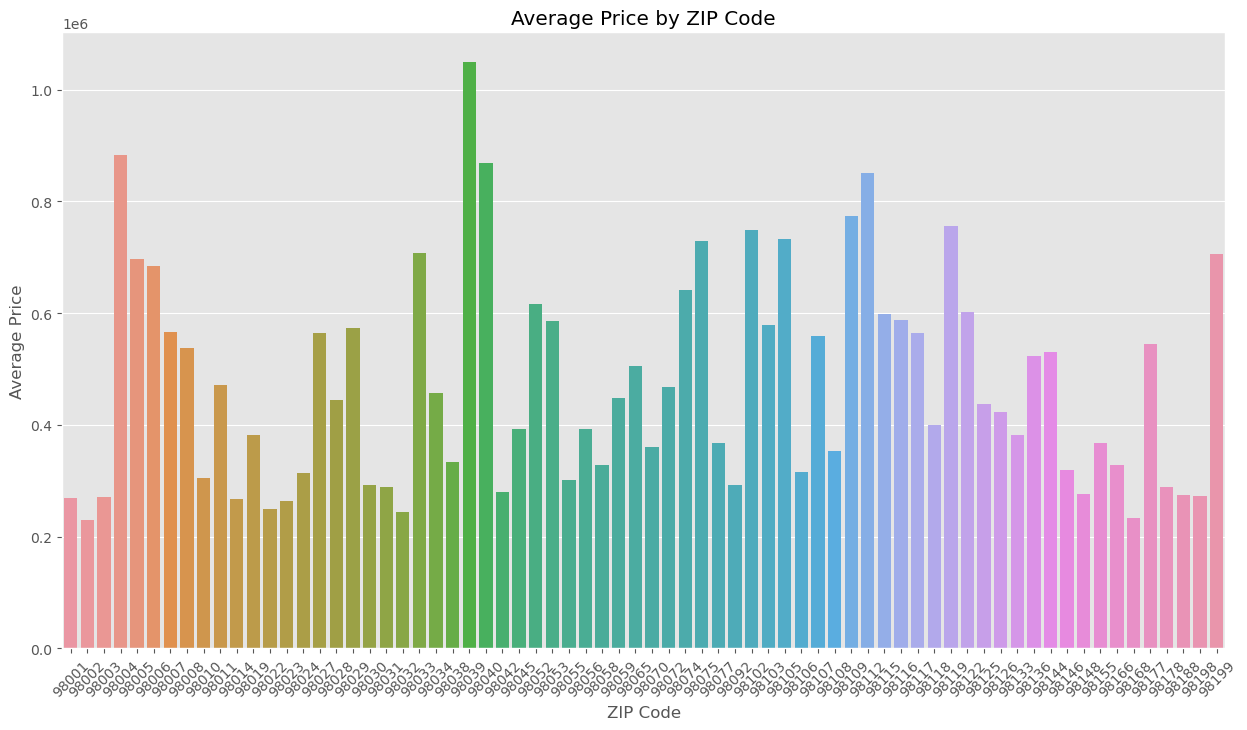

In [114]:
plt.figure(figsize=(15, 8))
sns.barplot(x='zipcode', y='price', data=df, errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('ZIP Code')
plt.ylabel('Average Price')
plt.title('Average Price by ZIP Code')
plt.show()

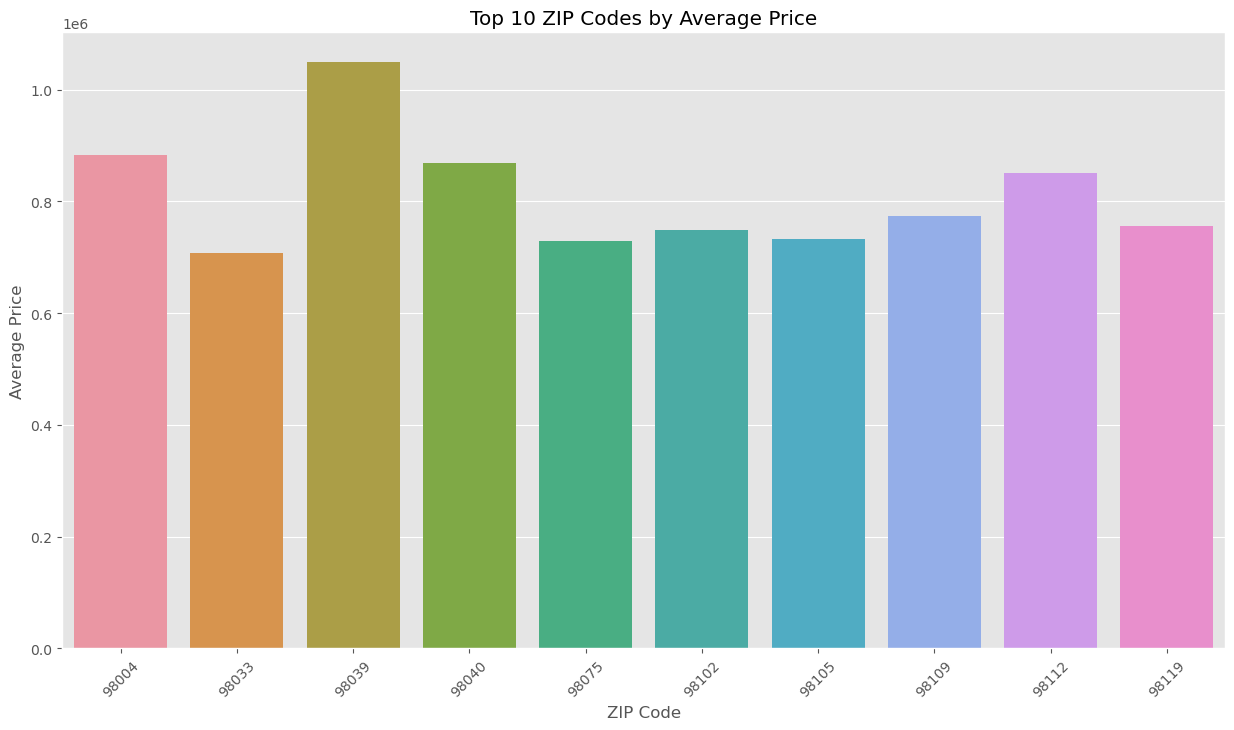

In [115]:
# Calculate the average price for each ZIP code
avg_price_per_zip = df.groupby('zipcode')['price'].mean().reset_index()

# Sort ZIP codes by average price in descending order and take top 10
top_10_zip = avg_price_per_zip.sort_values('price', ascending=False).head(10)

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='zipcode', y='price', data=top_10_zip, errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('ZIP Code')
plt.ylabel('Average Price')
plt.title('Top 10 ZIP Codes by Average Price')
plt.show()

# Analysis Summary:

Upon conducting multiple regression analyses, the fifth model demonstrated a robust R-squared value of 0.775, signifying that approximately 78% of the variability in home prices within King County can be explained by the predictors in the model. Notably, the postal code emerged as one of the most significant determinants influencing property valuation. Additional variables that were positively correlated with property prices include:

- Living Space Square Footage
- Building Grade, as per the King County Grading System
- Average Interior Square Footage of the Nearest 15 Residences

## Strategic Recommendations for a Pro Home Builder Company:

To optimize the profitability and marketability of residential properties in King County, the following strategies are recommended:

- Strategic Location Selection: Prioritize property acquisition in high-value zip codes to benefit from the area's intrinsically higher property valuations.

- Optimize Living Space: Expand the square footage of the living area to align with the positive correlation observed between living space and property value.

- Quality of Construction: Employ premium-quality building materials and construction techniques to secure the highest possible building grade according to the King County Grading System. This will not only enhance the property's intrinsic value but also its appeal to potential buyers.

- Neighborhood Composition: Opt for land parcels where the surrounding 15 residences have a higher average interior square footage. This is indicative of a neighborhood's overall property value and can positively influence the value of the new development.

**By implementing these targeted strategies, housing development firms can substantially increase the likelihood of marketing higher-priced homes in King County**